In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import missingno
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
#from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor, StackingRegressor, GradientBoostingRegressor

#from category_encoders import CatBoostEncoder
from lazypredict.Supervised import LazyRegressor

import optuna
import xgboost as xgb
import catboost
import lightgbm



/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Display All Columns Dataset

In [3]:
pd.set_option('display.max_columns', None)

# Import Dataset

In [6]:
print(f"The shape of the training dataset is: {train_dataset.shape}")

The shape of the training dataset is: (1460, 81)


In [4]:
train_dataset = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
train_dataset.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
test_dataset = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
test_dataset.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH        80.00    11622   Pave   NaN      Reg   
1  1462          20       RL        81.00    14267   Pave   NaN      IR1   
2  1463          60       RL        74.00    13830   Pave   NaN      IR1   
3  1464          60       RL        78.00     9978   Pave   NaN      IR1   
4  1465         120       RL        43.00     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        0.00        TA        TA     CBlock       TA       TA           No   
1      108.00        TA        TA     CBlock       TA       TA           No   
2        0.00        TA        TA      PConc       Gd       TA           No   
3       20.00        TA        TA      PConc       TA       TA           No   
4        0.00        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec      468.00          LwQ      144.00     270.00       882.00   
1          ALQ      923.00          Unf        0.00     406.00      1329.00   
2          GLQ      791.00          Unf        0.00     137.00       928.00   
3          GLQ      602.00          Unf        0.00     324.00       926.00   
4          ALQ      263.00          Unf        0.00    1017.00      1280.00   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896          0.00          0.00         1         0             2   
1       1329          0.00          0.00         1         1             3   
2       1629          0.00          0.00         2         1             3   
3       1604          0.00          0.00         2         1             3   
4       1280          0.00          0.00         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [6]:
print(f"The shape of the test dataset is: {test_dataset.shape}")

The shape of the test dataset is: (1459, 80)


In [7]:
# Combining the train and test sets
combined_data = pd.concat((train_dataset, test_dataset), axis = 0)
combined_data.shape

(2919, 81)

# EDA

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Check Null Values

In [10]:
train_null = train_dataset.isna().sum()
train_null.drop(labels='SalePrice', axis =0, inplace=True)

test_null = test_dataset.isna().sum()

#Compare the null values in both sets
train_null.compare(test_null).sort_values(by='self', ascending=False)

self   other
PoolQC       1453.00 1456.00
MiscFeature  1406.00 1408.00
Alley        1369.00 1352.00
Fence        1179.00 1169.00
MasVnrType    872.00  894.00
FireplaceQu   690.00  730.00
LotFrontage   259.00  227.00
GarageType     81.00   76.00
GarageYrBlt    81.00   78.00
GarageFinish   81.00   78.00
GarageQual     81.00   78.00
GarageCond     81.00   78.00
BsmtFinType2   38.00   42.00
BsmtExposure   38.00   44.00
BsmtFinType1   37.00   42.00
BsmtCond       37.00   45.00
BsmtQual       37.00   44.00
MasVnrArea      8.00   15.00
Electrical      1.00    0.00
GarageArea      0.00    1.00
GarageCars      0.00    1.00
MSZoning        0.00    4.00
Functional      0.00    2.00
KitchenQual     0.00    1.00
BsmtHalfBath    0.00    2.00
BsmtFullBath    0.00    2.00
TotalBsmtSF     0.00    1.00
BsmtUnfSF       0.00    1.00
BsmtFinSF2      0.00    1.00
BsmtFinSF1      0.00    1.00
Exterior2nd     0.00    1.00
Exterior1st     0.00    1.00
Utilities       0.00    2.00
SaleType        0.00    1.00

## Sorting Missing Values By Percentage

In [11]:
missing_value = pd.DataFrame(data=train_dataset.isna().sum(), index=train_dataset.columns, columns=['Missing'])
missing_value['Percentage'] = (missing_value['Missing']/1460) * 100
missing_value = missing_value.sort_values(by='Percentage', ascending=False)

missing_value.head(20)

Missing  Percentage
PoolQC           1453       99.52
MiscFeature      1406       96.30
Alley            1369       93.77
Fence            1179       80.75
MasVnrType        872       59.73
FireplaceQu       690       47.26
LotFrontage       259       17.74
GarageYrBlt        81        5.55
GarageCond         81        5.55
GarageType         81        5.55
GarageFinish       81        5.55
GarageQual         81        5.55
BsmtFinType2       38        2.60
BsmtExposure       38        2.60
BsmtQual           37        2.53
BsmtCond           37        2.53
BsmtFinType1       37        2.53
MasVnrArea          8        0.55
Electrical          1        0.07
Id                  0        0.00

## Visualize Missing Values

(<Axes: >, <Axes: >)

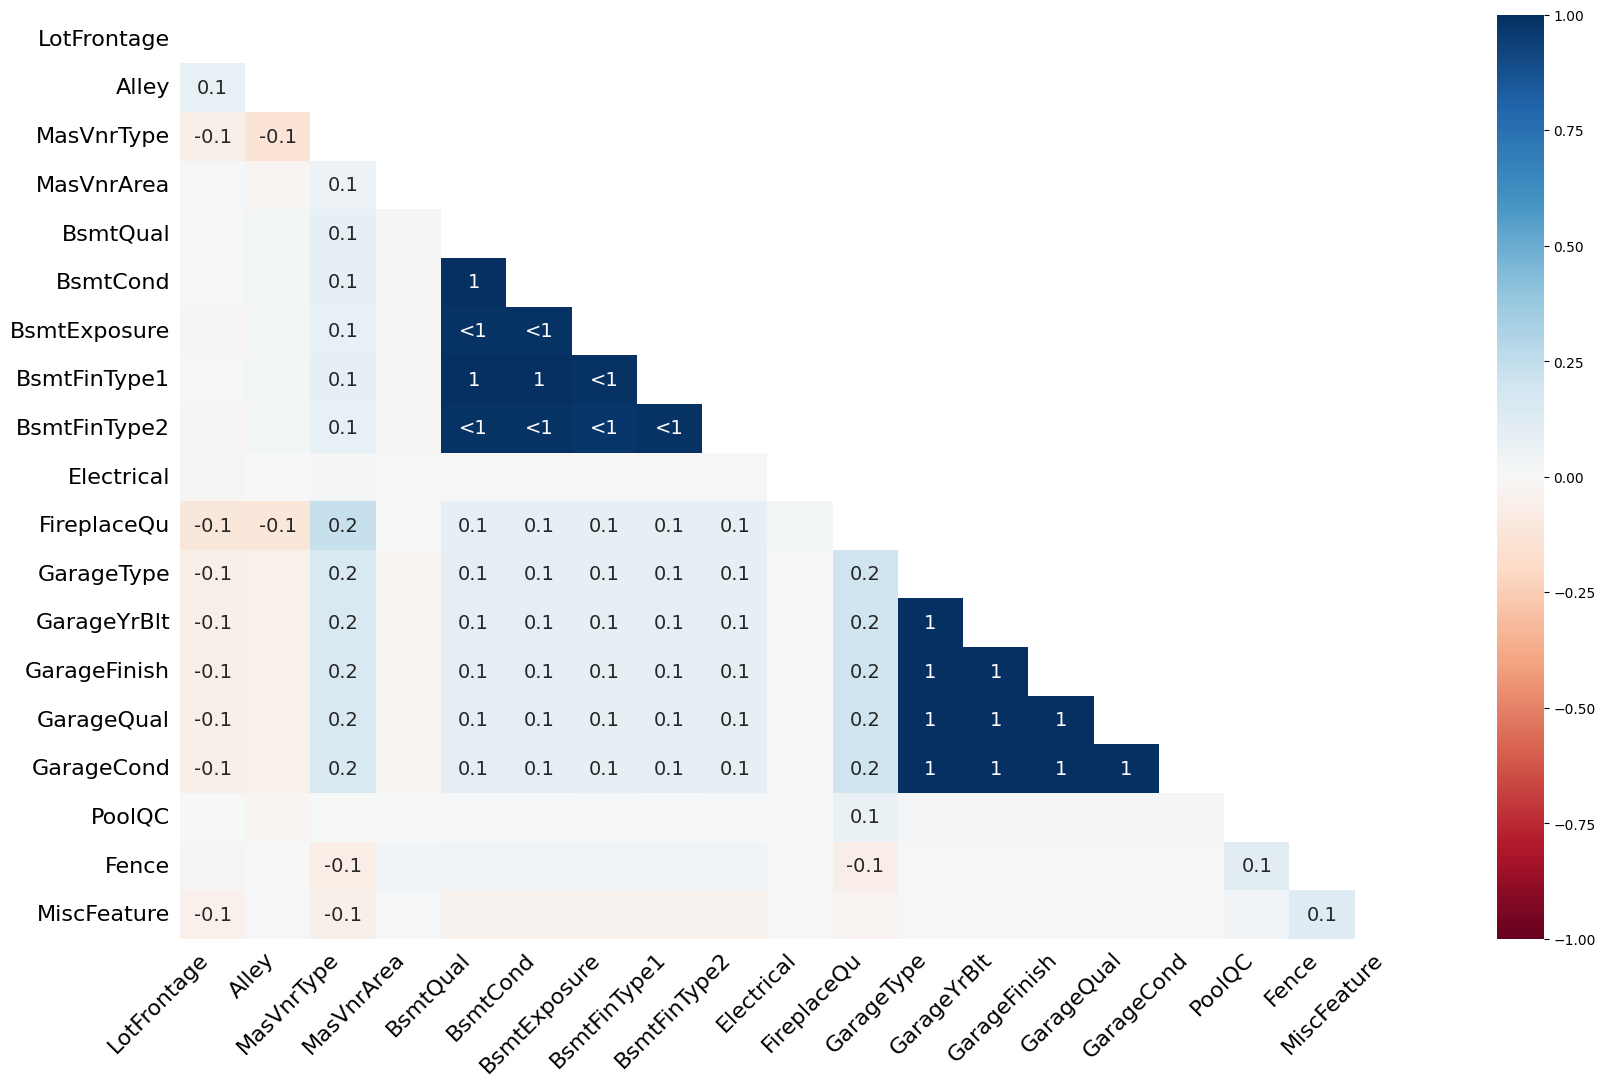

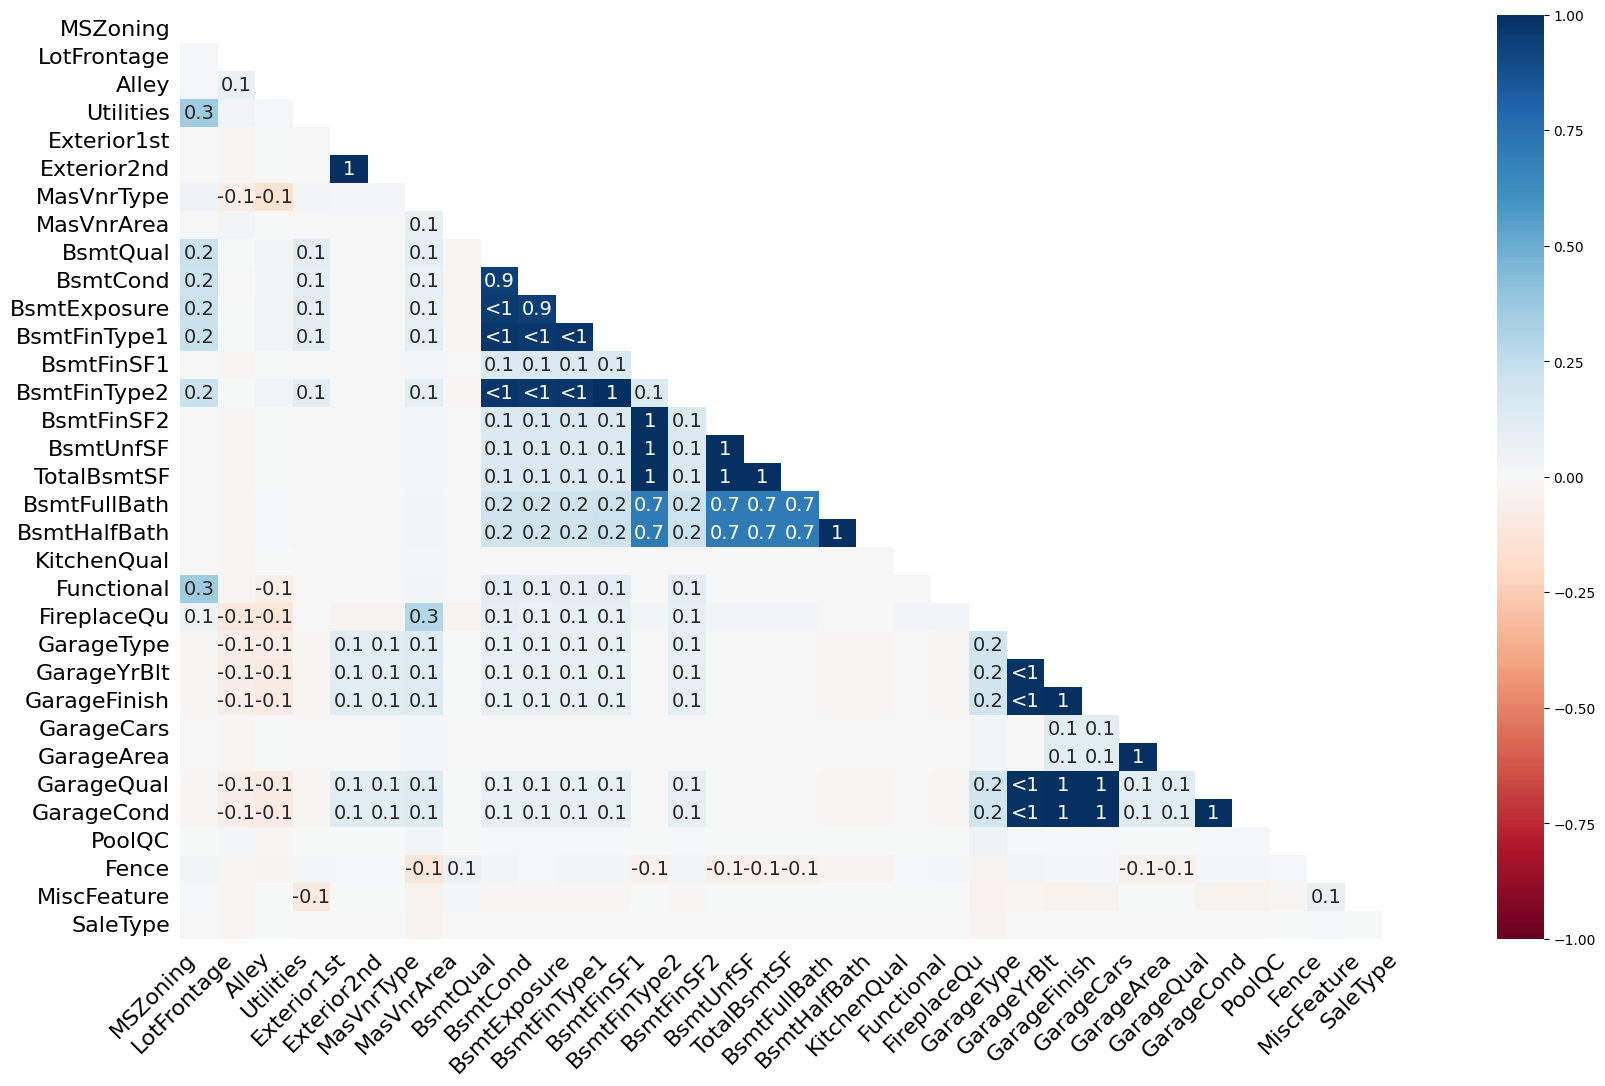

In [13]:
missingno.heatmap(df=train_dataset),missingno.heatmap(df=test_dataset)

## CHecking Distribution 

In [12]:
numerical_columns = train_dataset.select_dtypes(include=['int64', 'float']).columns.tolist()
categorical_columns = train_dataset.select_dtypes(include='object').columns.tolist()

numerical_columns = [col for col in numerical_columns if col != 'Id' and col != 'SalePrice']
discrete_columns = [col for col in numerical_columns if len(train_dataset[col].unique()) < 25]
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]

print(f"Number of categorical features: {len(categorical_columns)}")
print(f"Number of numerical features:   {len(numerical_columns)}")
print(f"Number of discrete features:    {len(discrete_columns)}")
print(f"Number of continuous features:  {len(continuous_columns)}")

Number of categorical features: 43
Number of numerical features:   36
Number of discrete features:    18
Number of continuous features:  18


## The Distribution(Categorical Column)

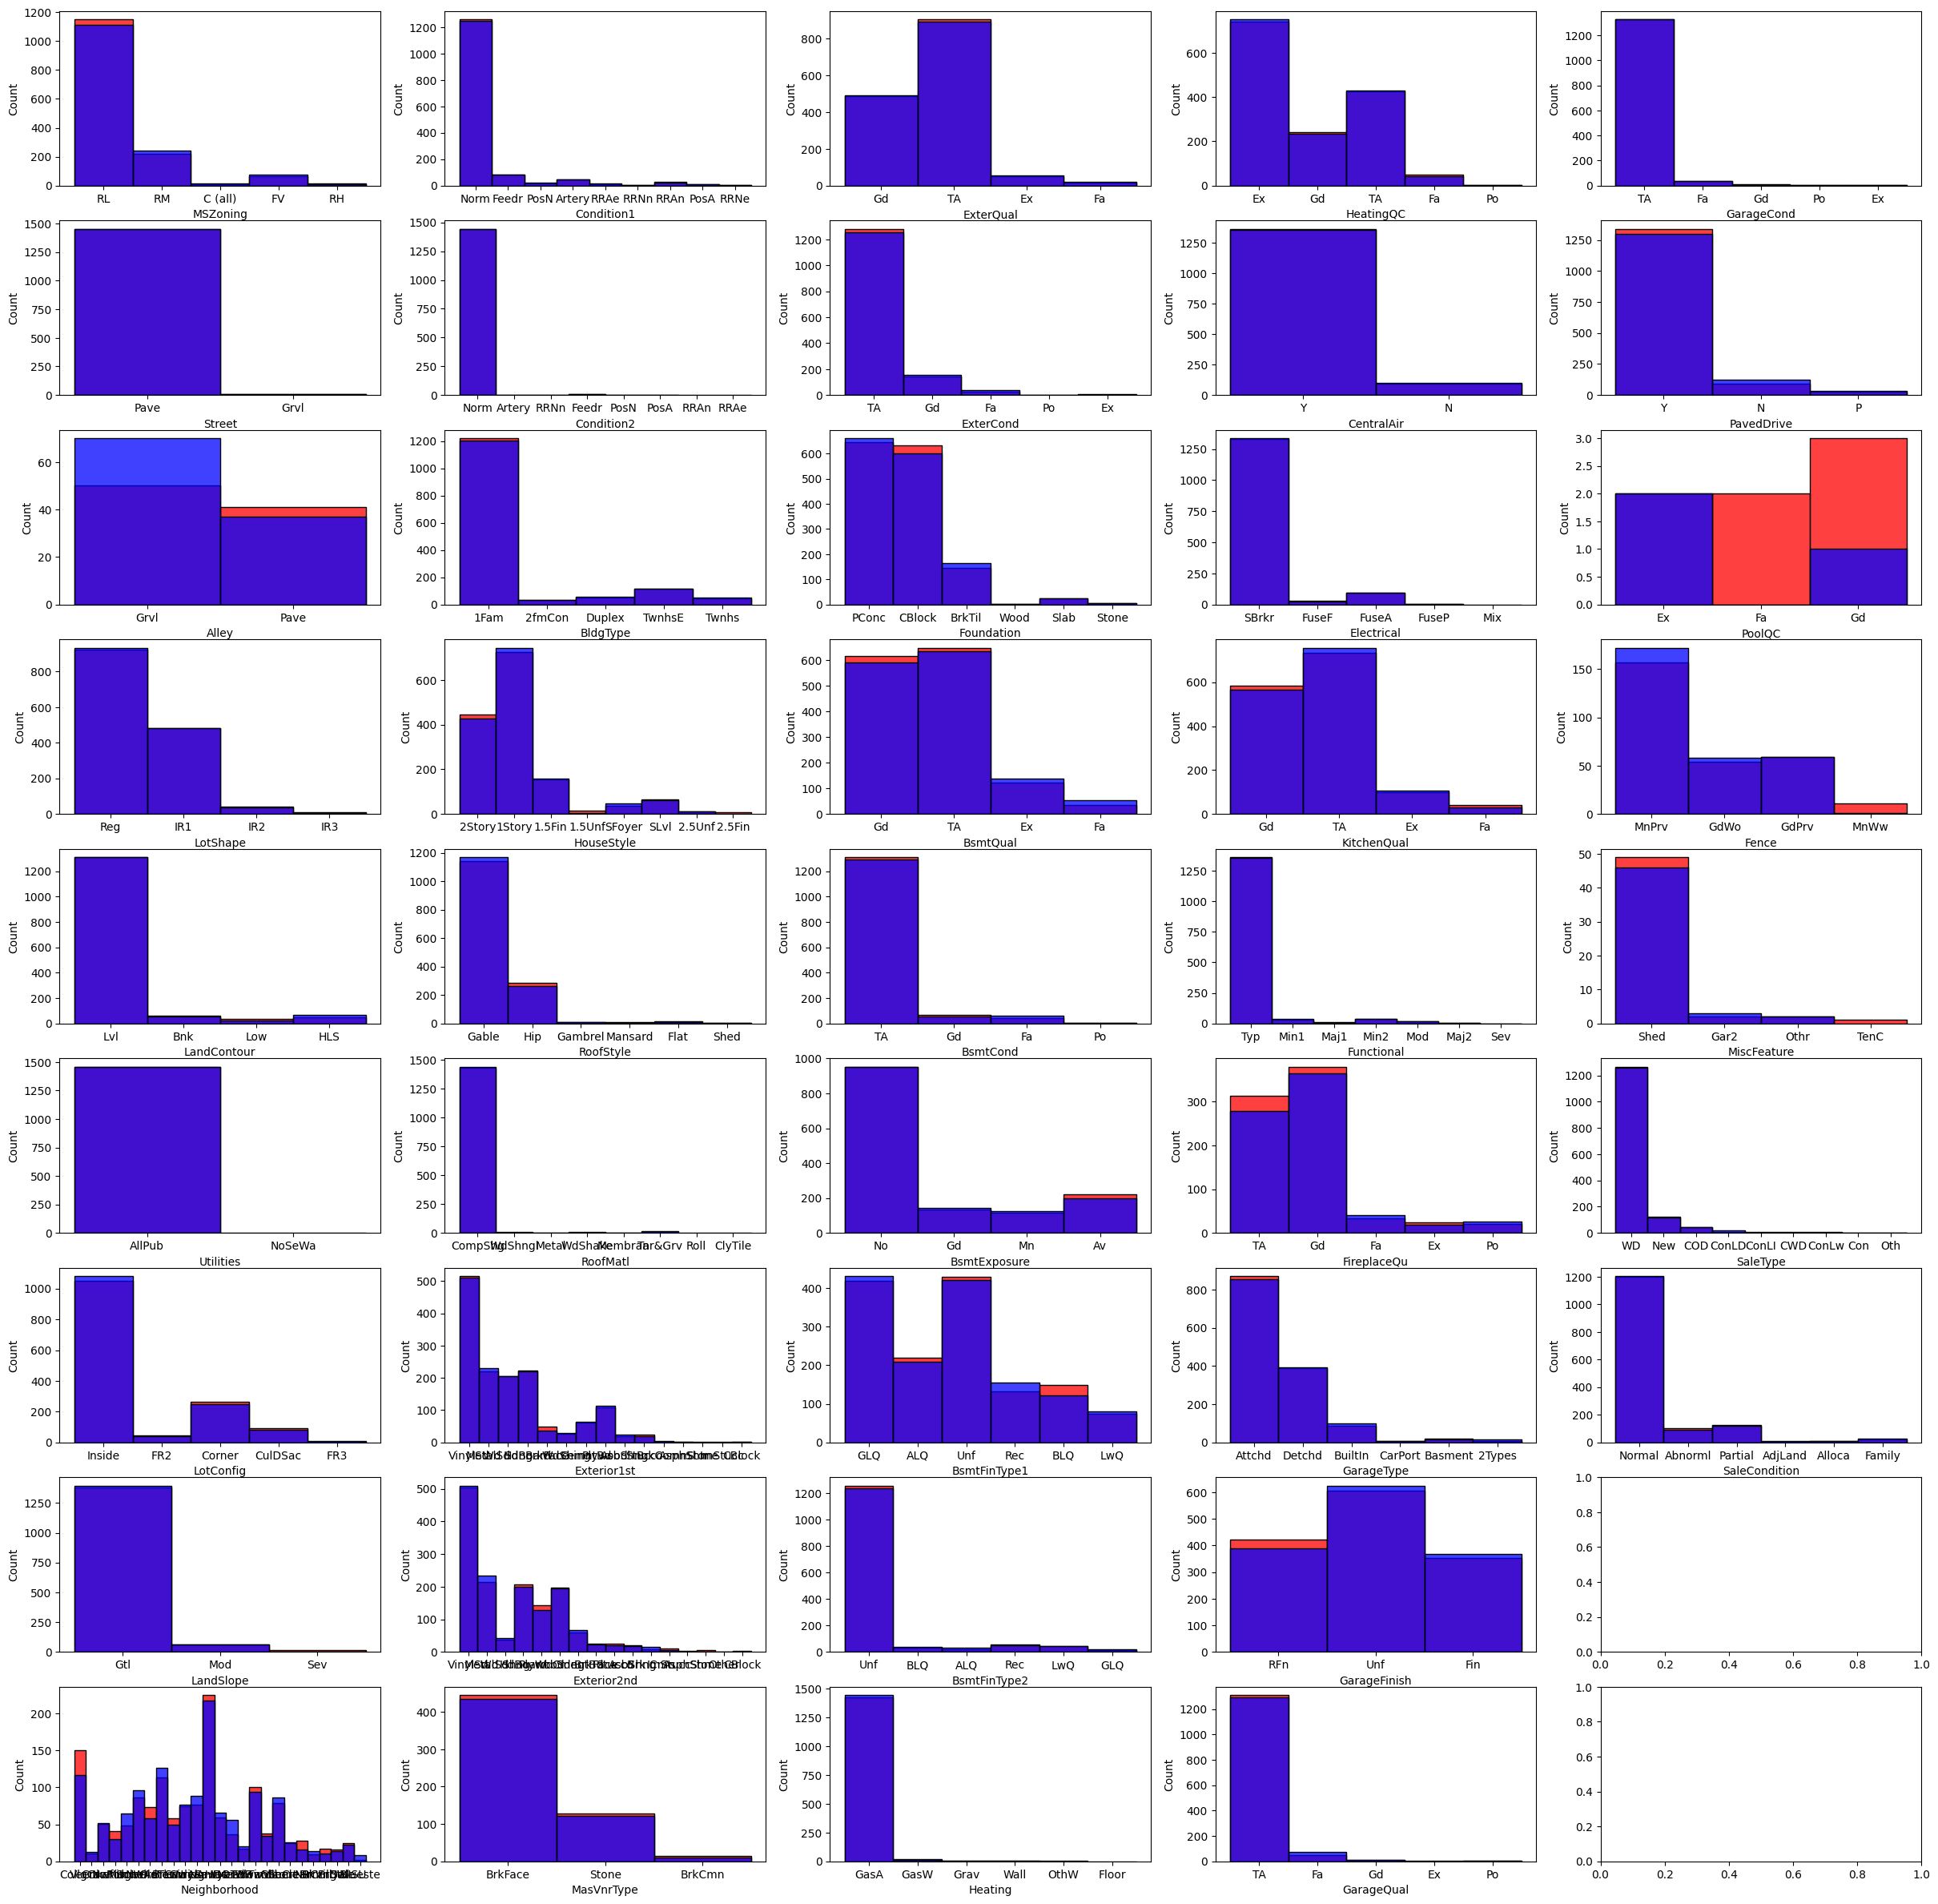

In [13]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(30,30))
for i, feature in enumerate(categorical_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%9, i//9], color = 'red')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%9, i//9], color = 'blue')

### Continuous column

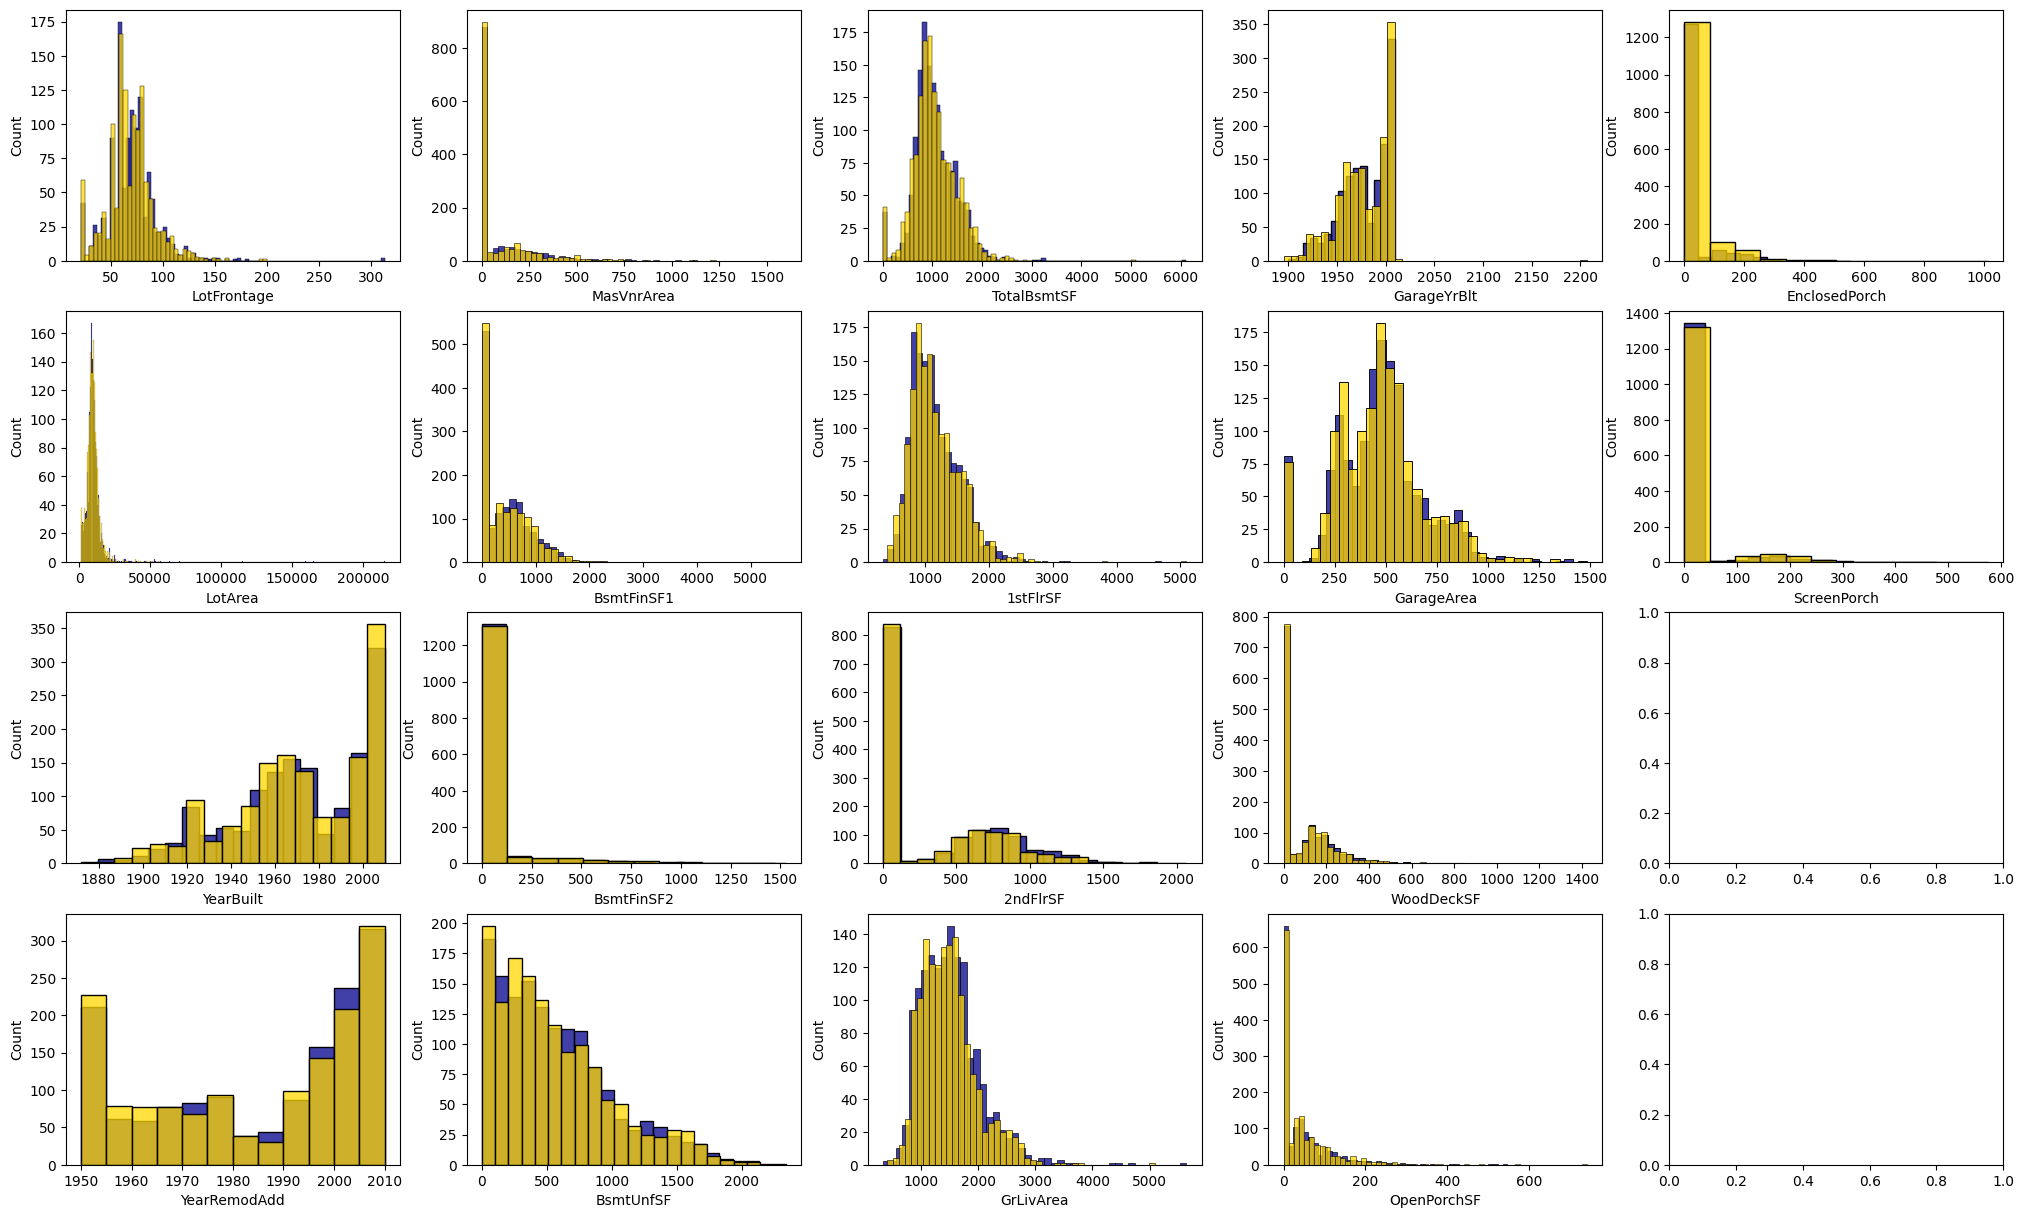

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,15))
for i, feature in enumerate(continuous_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%4, i//4], color = 'darkblue')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%4, i//4], color = 'gold')

## Discrete Column

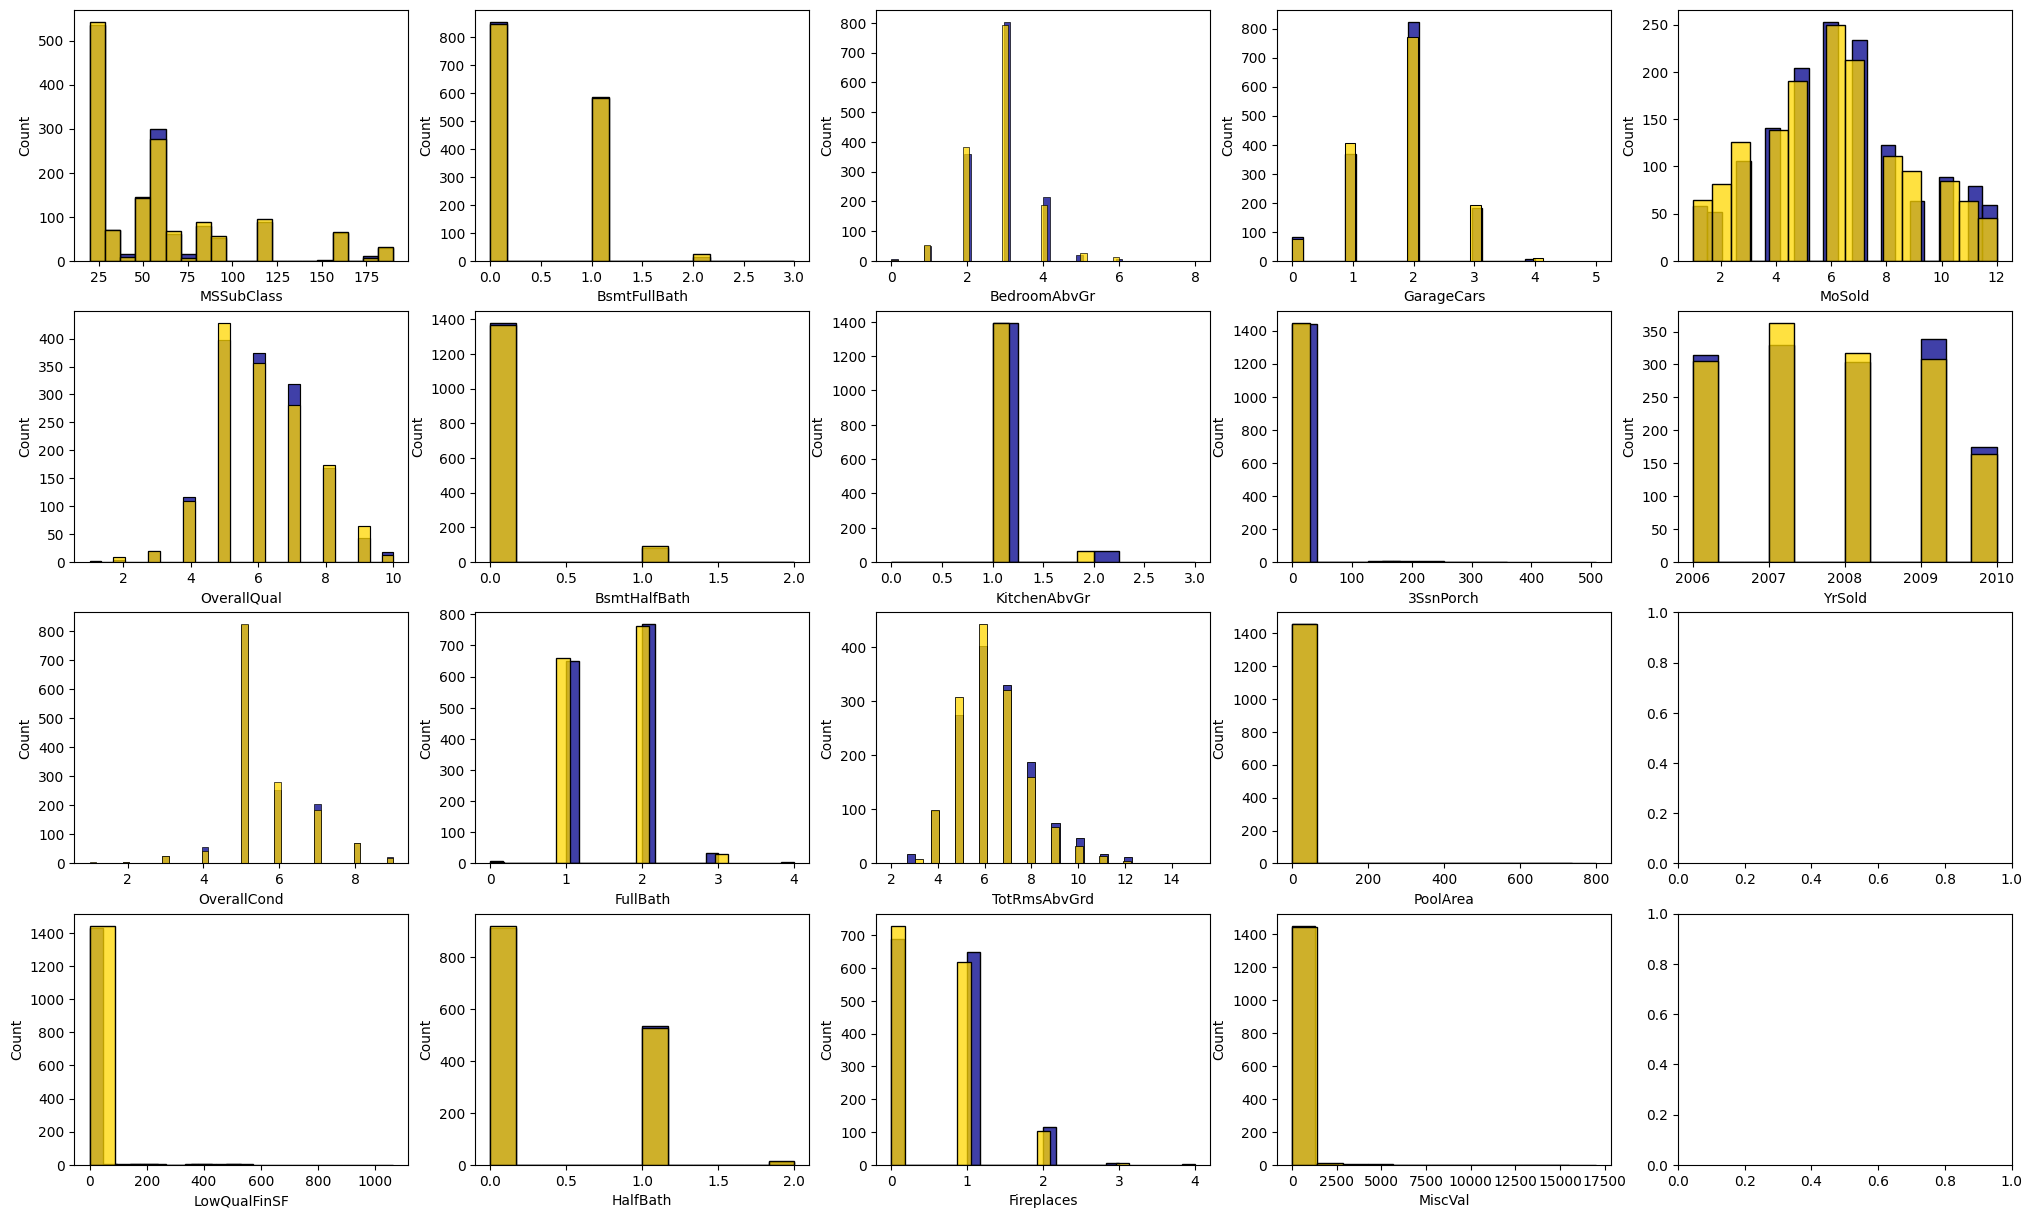

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,15))
for i, feature in enumerate(discrete_columns):
    sns.histplot(data=train_dataset, x=feature, ax=axes[i%4, i//4], color = 'darkblue')
    sns.histplot(data=test_dataset, x=feature, ax=axes[i%4, i//4], color = 'gold')

## Checking Skewness

In [16]:
skew_trainset = train_dataset[numerical_columns].skew().sort_values(ascending=False)
skew_testset = test_dataset[numerical_columns].skew().sort_values(ascending=False)

avg_skewness = (skew_trainset + skew_testset)/2
avg_skewness = avg_skewness.sort_values(ascending=False)

print(avg_skewness)

MiscVal         22.28
PoolArea        17.51
LowQualFinSF    12.59
3SsnPorch       11.41
LotArea          7.66
KitchenAbvGr     4.28
BsmtFinSF2       4.15
ScreenPorch      3.96
BsmtHalfBath     3.94
EnclosedPorch    3.88
MasVnrArea       2.60
OpenPorchSF      2.53
WoodDeckSF       1.84
1stFlrSF         1.47
BsmtFinSF1       1.43
LotFrontage      1.41
MSSubClass       1.38
GrLivArea        1.25
TotalBsmtSF      1.17
BsmtUnfSF        0.92
2ndFlrSF         0.86
TotRmsAbvGrd     0.76
Fireplaces       0.73
HalfBath         0.70
BsmtFullBath     0.62
OverallCond      0.57
BedroomAbvGr     0.32
GarageArea       0.24
OverallQual      0.20
MoSold           0.20
FullBath         0.17
YrSold           0.13
GarageCars      -0.22
GarageYrBlt     -0.40
YearRemodAdd    -0.45
YearBuilt       -0.60
dtype: float64


## Label Distribution

<Axes: xlabel='SalePrice', ylabel='Count'>

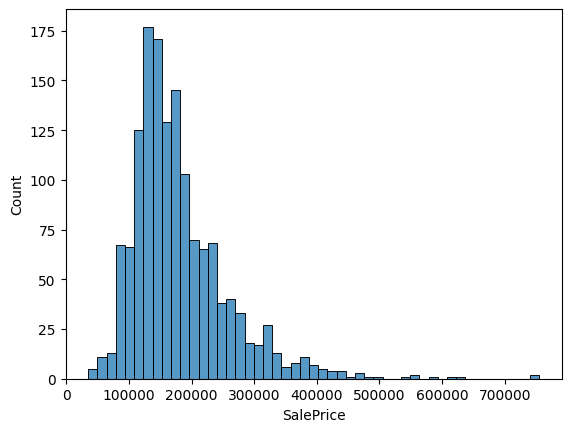

In [17]:
sns.histplot(data=train_dataset, x='SalePrice')

## Corelation Comparison

<Axes: >

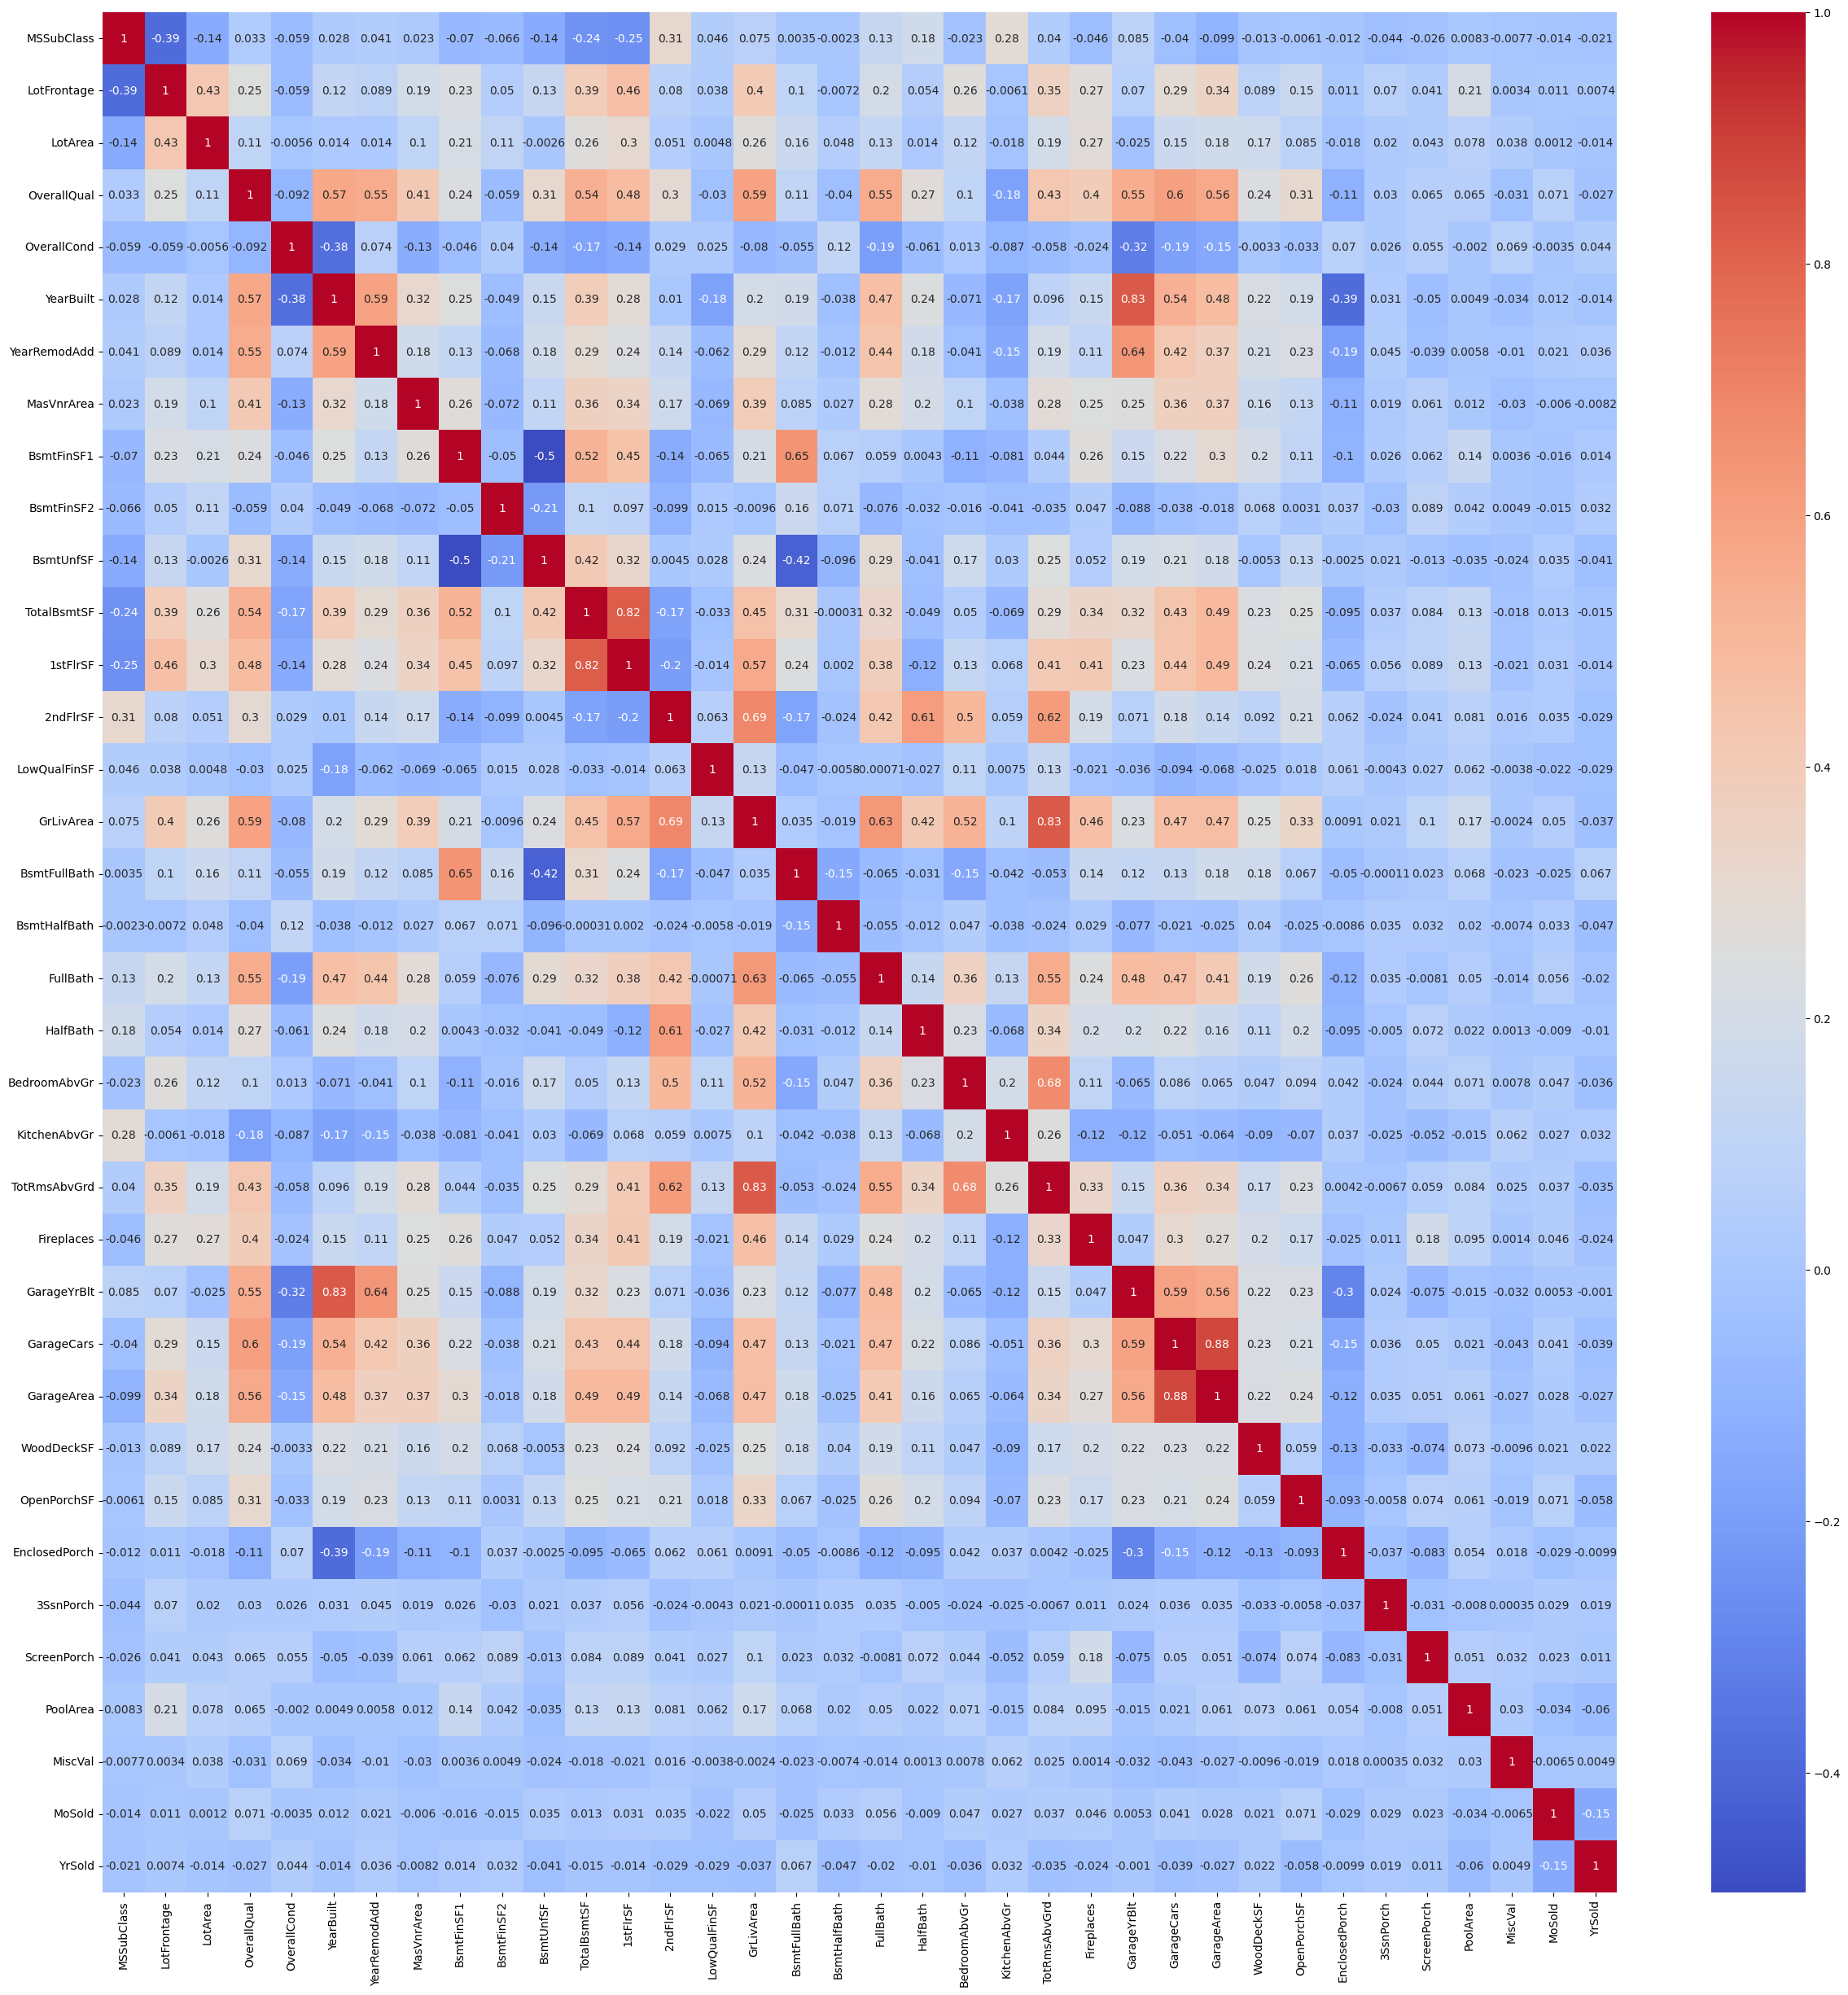

In [18]:
numeric_data = pd.DataFrame()

for feature in numerical_columns:
    numeric_data[feature] = train_dataset[feature]

corr_data = numeric_data.corr(method='pearson')

plt.figure(figsize=(30,30))
sns.heatmap(data= corr_data, cmap='coolwarm', annot=True, fmt='.2g')

<Axes: >

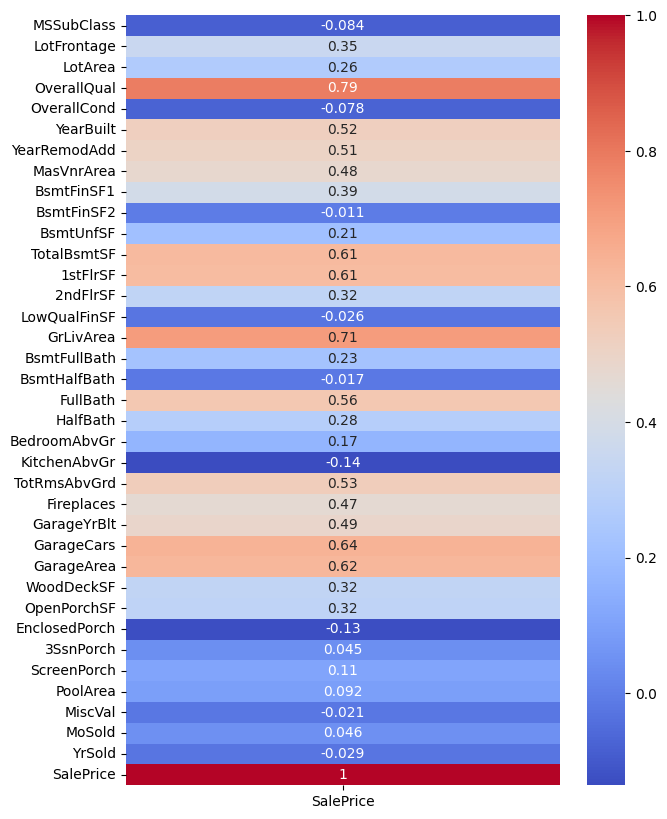

In [19]:
# CORRELATION WITH SALEPRICE

numeric_data['SalePrice'] = train_dataset['SalePrice'] 
corr_data = numeric_data.corr(method='pearson')
corr_data = corr_data[['SalePrice']]     # ONLY SHOWS CORRELATION FOR SALEPRICE FEATURE


plt.figure(figsize=(7,10))
sns.heatmap(data=corr_data, cmap='coolwarm', annot=True, fmt='.2g')

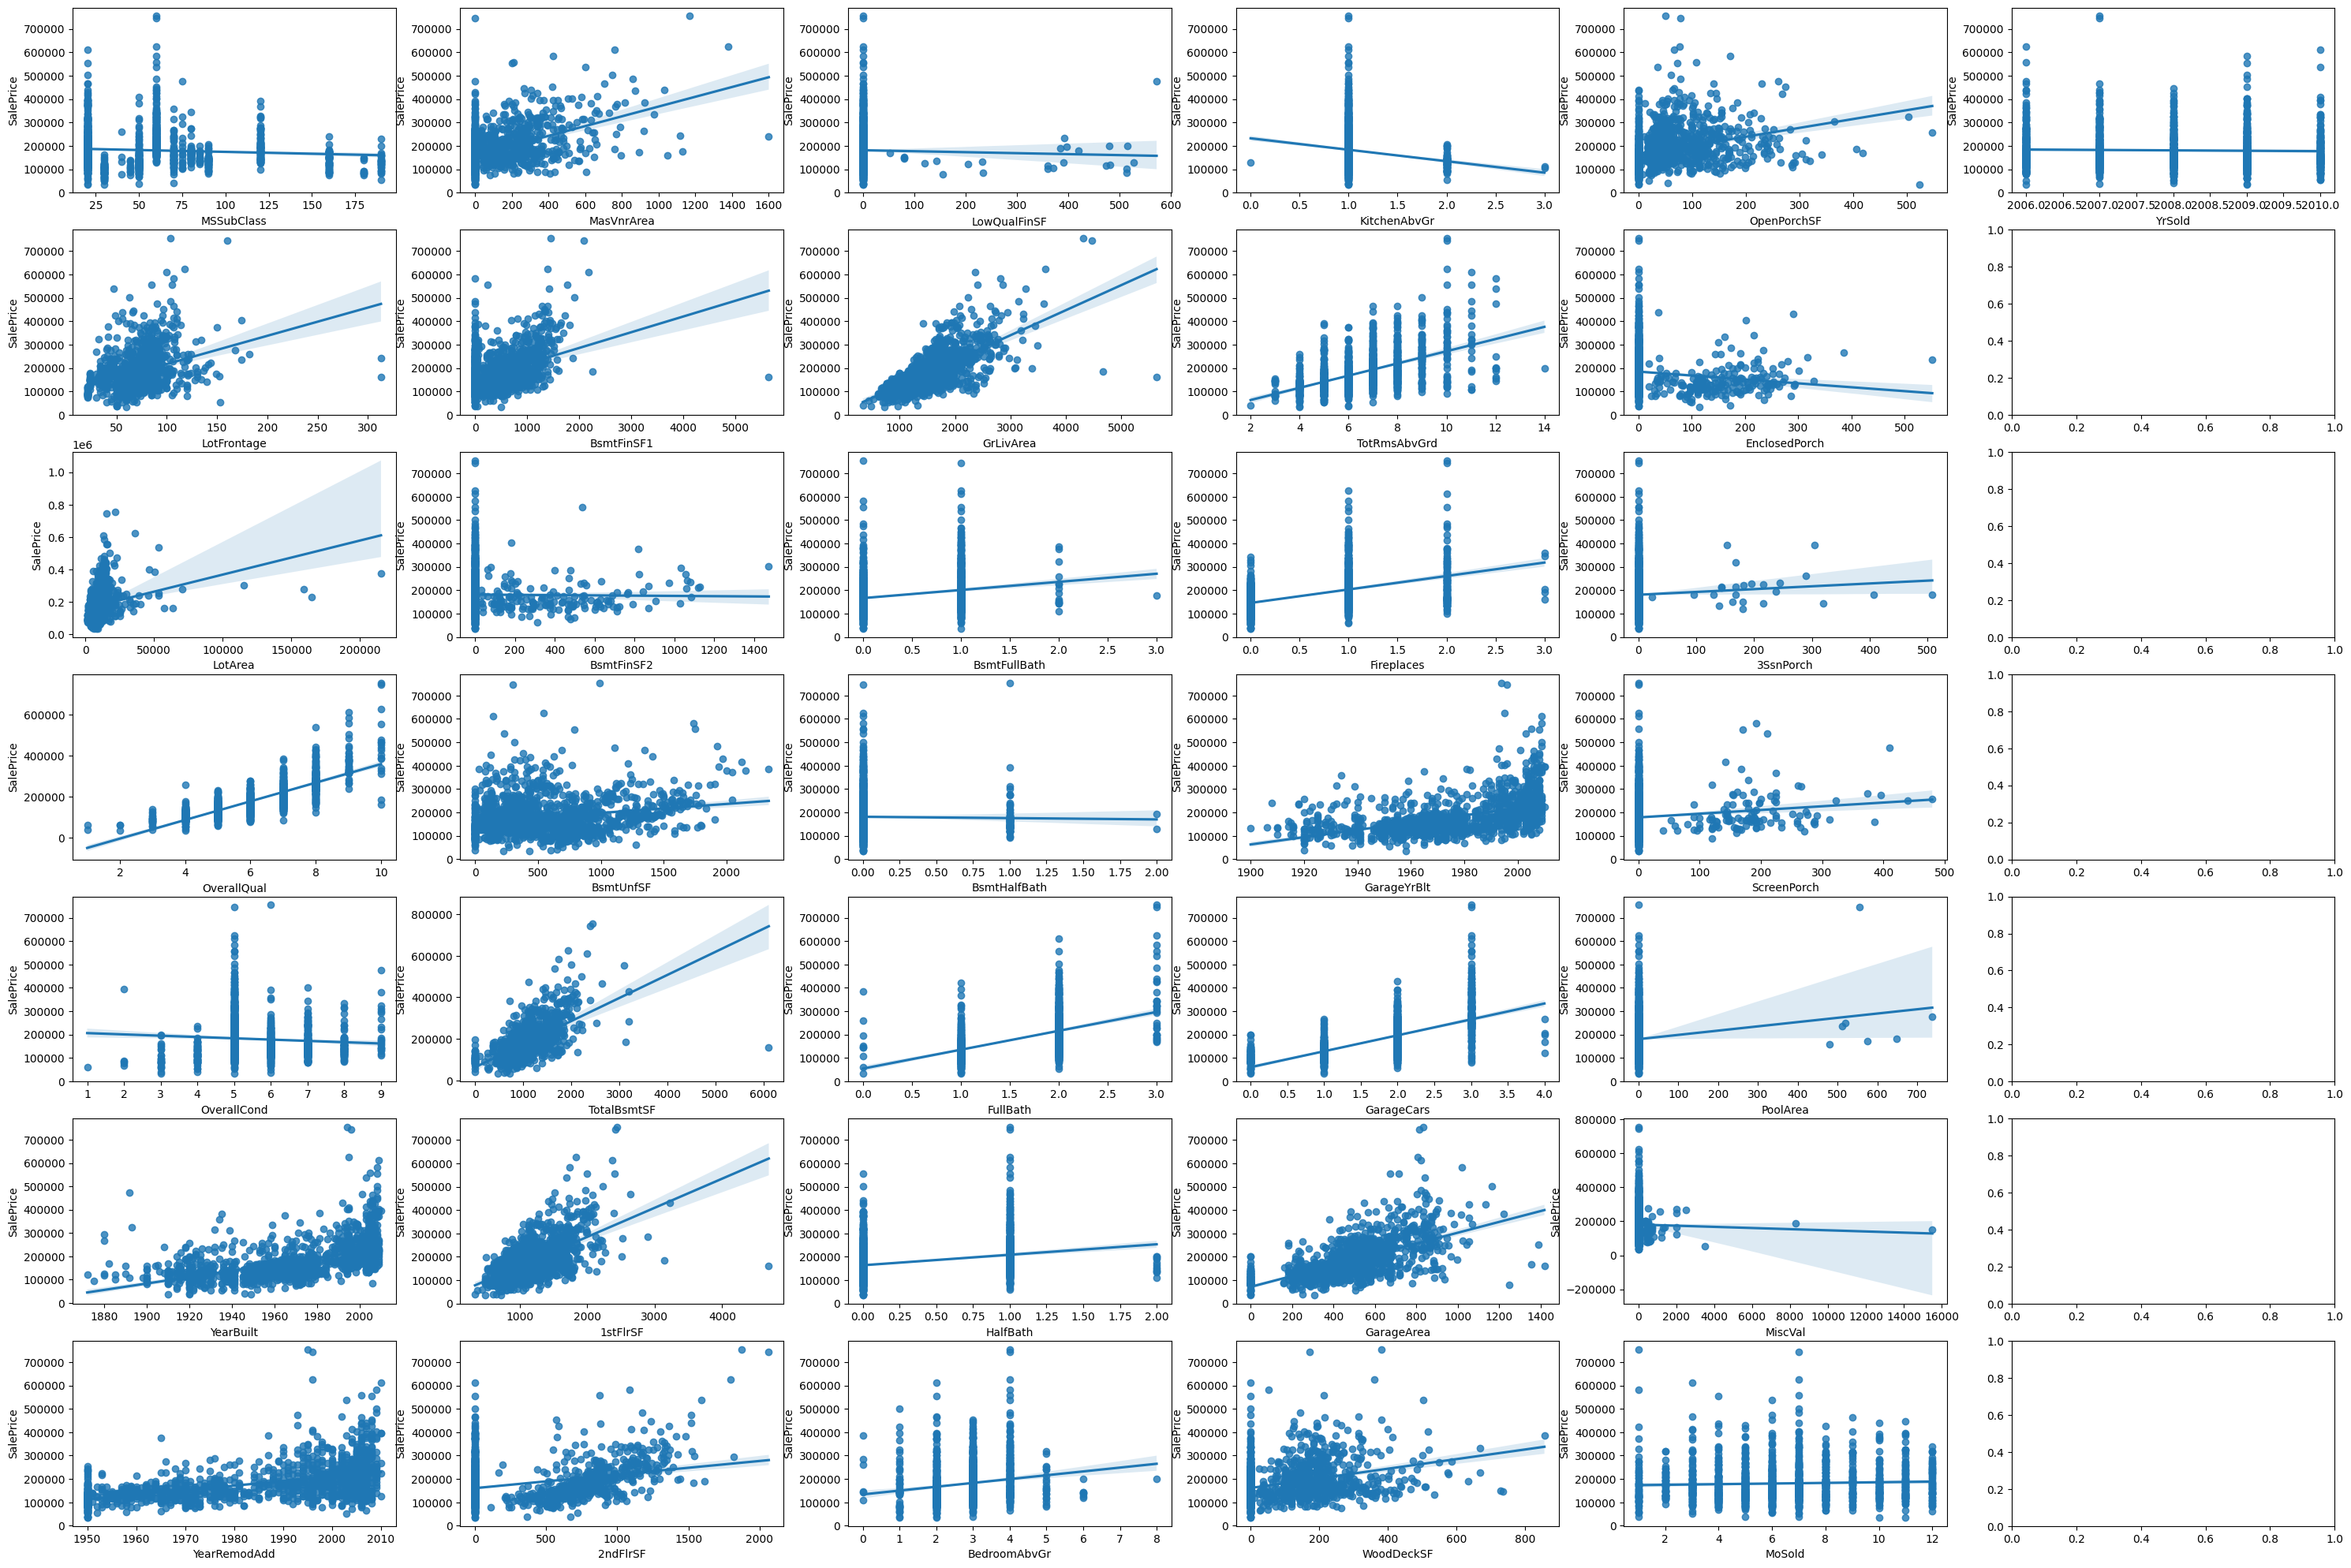

In [20]:
# LINEARITY USING SCATTER PLOT

fig , axes = plt.subplots(nrows=7, ncols=6, figsize=(37,25))

for i , feature in enumerate(numerical_columns):
    sns.regplot(data= train_dataset, x= feature, y= 'SalePrice', ax= axes[i%7, i//7])

plt.show()

Text(0.5, 1.0, 'House price vs YearSold')

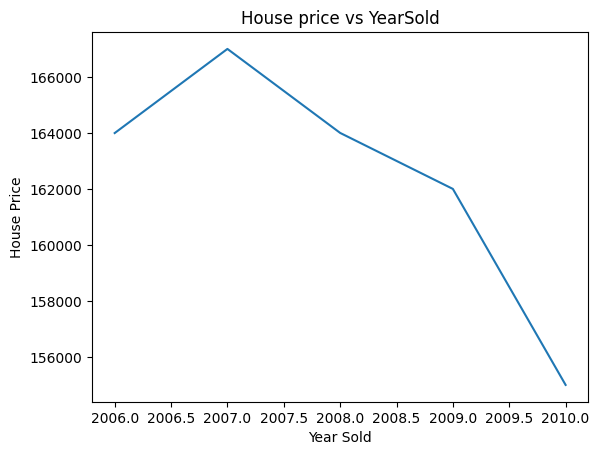

In [21]:
# RELATION BETWEEN YRSOLD AND SALEPRICE
combined_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House price vs YearSold')

In [22]:
# FIRST DROP COLUMNS WITH MANY NULL VALUES
cols_with_many_null = ['PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
combined_data.drop(labels=cols_with_many_null, axis=1, inplace=True)

# NEXT DROP COLUMNS WITH MANY ZERO VALUES
cols_with_many_zero = ['LowQualFinSF', 'MiscVal', '3SsnPorch', 'PoolArea']
combined_data.drop(labels=cols_with_many_zero, axis=1, inplace=True)

# LAST DROP COLUMNS WITH DOMINANT 1 LABEL
cols_with_dominant_label = ['Id','RoofMatl', 'Street', 'Condition2', 'Utilities', 'Heating']
combined_data.drop(labels=cols_with_dominant_label, axis=1, inplace=True)

combined_data.columns , len(combined_data.columns)  

(Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', 'ScreenPorch', 'MiscFeature', 'MoSold', 'YrSold',
        'SaleTyp

In [23]:
# FIND ALL DATE FEATURE
year_feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in year_feature:
    combined_data[feature] = combined_data['YrSold'] - combined_data[feature]

combined_data[year_feature].head(5) 

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5         5.00
1         31            31        31.00
2          7             6         7.00
3         91            36         8.00
4          8             8         8.00

In [24]:
# FILL NUMERICAL MISSING VALUES WITH ZERO VALUES
numerical_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_columns:
    combined_data[feature] = combined_data[feature].fillna(0)

# FILL CONTINUOUS MISSING VALUES 
dropped_cols = cols_with_dominant_label + cols_with_many_null
mode_feature = ['Electrical', 'MsZoning', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Utilities', 'SaleType']


for feature in categorical_columns:
    if feature not in dropped_cols:
        if feature not in mode_feature:
            combined_data[feature] = combined_data[feature].fillna('Unknown')
        else:
            combined_data[feature] = combined_data[feature].fillna(combined_data[feature].mode()[0])

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   LotShape       2919 non-null   object 
 4   LandContour    2919 non-null   object 
 5   LotConfig      2919 non-null   object 
 6   LandSlope      2919 non-null   object 
 7   Neighborhood   2919 non-null   object 
 8   Condition1     2919 non-null   object 
 9   BldgType       2919 non-null   object 
 10  HouseStyle     2919 non-null   object 
 11  OverallQual    2919 non-null   int64  
 12  OverallCond    2919 non-null   int64  
 13  YearBuilt      2919 non-null   int64  
 14  YearRemodAdd   2919 non-null   int64  
 15  RoofStyle      2919 non-null   object 
 16  Exterior1st    2919 non-null   object 
 17  Exterior2nd    2919 non-null   object 
 18  MasVnrType   

In [25]:
# ADD NEW FEATURE 'GarageEfficiency'
combined_data['GarageEfficiency'] = combined_data['GarageArea'] / (combined_data['GarageCars'] + 1)   # +1 TO AVOID DIVISION BY ZERO

# ADD NEW FEATURE 
#combined_data['LivabilityScore'] = combined_data['GrLivArea'] + (combined_data['FullBath'] * 2) + (combined_data['HalfBath'])

# ADD NEW FEATURE TotalArea
combined_data['TotalArea'] = combined_data['GrLivArea'] + combined_data['TotalBsmtSF']

<Axes: >

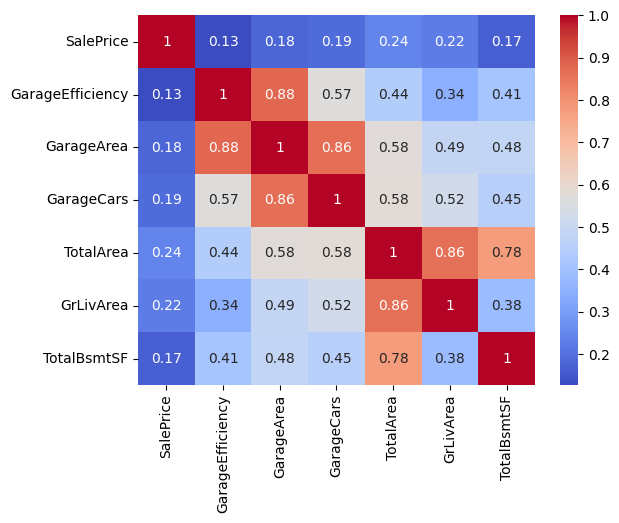

In [26]:
# CHECK CORRELATION OF NEW FEATURE 

new_feature = combined_data[['SalePrice','GarageEfficiency','GarageArea','GarageCars','TotalArea','GrLivArea','TotalBsmtSF']]

corr_new_feature = new_feature.corr(method='spearman')

sns.heatmap(data=corr_new_feature, cmap='coolwarm', annot=True, fmt='.2g')

## Dealing with Multicolinearity

This is Usually Done By first identifying the columns with that are multicolinear
Then scaling, in our case we use the standardscaler, we use PCA to deal with the features with multicolinearity since it may affecgt the perfomance of the model


In [40]:
# Normalize
scaler = StandardScaler()
multi_colinear_1 = combined_data[['GarageArea', 'GarageCars']]
multi_colinear_1 = scaler.fit_transform(multi_colinear_1)

# Finding The Principle Component
pca_1 = PCA(n_components=None)
pca_1 = pca_1.fit_transform(multi_colinear_1)

multi_colinear_2 = combined_data[['1stFlrSF', 'TotalBsmtSF']]
multi_colinear_2 = scaler.fit_transform(multi_colinear_2)

# Finding The Principle Component
pca_2 = PCA(n_components=None)
pca_2 = pca_2.fit_transform(multi_colinear_2)

multi_colinear_3 = combined_data[['GrLivArea', 'TotRmsAbvGrd']]
multi_colinear_3 = scaler.fit_transform(multi_colinear_3)

# Finding The Principle Component
pca_3 = PCA(n_components=None)
pca_3 = pca_3.fit_transform(multi_colinear_3)


# # Finding The Principle Component
# pca_1 = PCA(n_components=None)
# pca_1 = pca_1.fit_transform(multi_colinear_1)

# pca_2 = PCA(n_components=None)
# pca_2 = pca_2.fit_transform(multi_colinear_2)

# pca_3 = PCA(n_components=None)
# pca_3 = pca_3.fit_transform(multi_colinear_3)

# CHOOSE PC1

pca_1  = PCA(n_components=1)
multi_coliner_1 = pca_1.fit_transform(multi_colinear_1)

pca_2  = PCA(n_components=1)
multi_colinear_2 = pca_2.fit_transform(multi_colinear_2)

pca_3  = PCA(n_components=1)
multi_colinear_3 = pca_3.fit_transform(multi_colinear_3)

# # ADD PC1 TO DATAFRAME
combined_data['multi_colinear_1'] = multi_colinear_1[:,0].ravel()
combined_data['multi_colinear_2'] = multi_colinear_2[:,0].ravel()
combined_data['multi_colinear_3'] = multi_colinear_3[:,0].ravel()



In [42]:
combined_data.head()


MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0          5             5     Gable     VinylSd     VinylSd    BrkFace   
1         31            31     Gable     MetalSd     MetalSd    Unknown   
2          7             6     Gable     VinylSd     VinylSd    BrkFace   
3         91            36     Gable     Wd Sdng     Wd Shng    Unknown   
4          8             8     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ      706.00          Unf        0.00     150.00       856.00   
1          ALQ      978.00          Unf        0.00     284.00      1262.00   
2          GLQ      486.00          Unf        0.00     434.00       920.00   
3          ALQ      216.00          Unf        0.00     540.00       756.00   
4          GLQ      655.00          Unf        0.00     490.00      1145.00   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0        Ex          Y      SBrkr       856       854       1710   
1        Ex          Y      SBrkr      1262         0       1262   
2        Ex          Y      SBrkr       920       866       1786   
3        Gd          Y      SBrkr       961       756       1717   
4        Ex          Y      SBrkr      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0          1.00          0.00         2         1             3             1   
1          0.00          1.00         2         0             3             1   
2          1.00          0.00         2         1             3             1   
3          1.00          0.00         1         0             3             1   
4          1.00          0.00         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd         5.00   
1          TA             6        Typ           1     Attchd        31.00   
2          Gd             6        Typ           1     Attchd         7.00   
3          Gd             7        Typ           1     Detchd         8.00   
4          Gd             9        Typ           1     Attchd         8.00   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn        2.00      548.00         TA         TA          Y   
1          RFn        2.00      460.00         TA         TA          Y   
2          RFn        2.00      608.00         TA         TA          Y   
3          Unf        3.00   

In [43]:
# DROP MULTICOLINEARITY FEATURE

multi_corr = ['GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd']

combined_data.drop(labels= multi_corr, axis=1, inplace=True )

combined_data.head(5)

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0          5             5     Gable     VinylSd     VinylSd    BrkFace   
1         31            31     Gable     MetalSd     MetalSd    Unknown   
2          7             6     Gable     VinylSd     VinylSd    BrkFace   
3         91            36     Gable     Wd Sdng     Wd Shng    Unknown   
4          8             8     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF HeatingQC  \
0          GLQ      706.00          Unf        0.00     150.00        Ex   
1          ALQ      978.00          Unf        0.00     284.00        Ex   
2          GLQ      486.00          Unf        0.00     434.00        Ex   
3          ALQ      216.00          Unf        0.00     540.00        Gd   
4          GLQ      655.00          Unf        0.00     490.00        Ex   

  CentralAir Electrical  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0          Y      SBrkr       854          1.00          0.00         2   
1          Y      SBrkr         0          0.00          1.00         2   
2          Y      SBrkr       866          1.00          0.00         2   
3          Y      SBrkr       756          1.00          0.00         1   
4          Y      SBrkr      1053          1.00          0.00         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0         1             3             1          Gd        Typ           0   
1         0             3             1          TA        Typ           1   
2         1             3             1          Gd        Typ           1   
3         0             3             1          Gd        Typ           1   
4         1             4             1          Gd        Typ           1   

  GarageType  GarageYrBlt GarageFinish GarageQual GarageCond PavedDrive  \
0     Attchd         5.00          RFn         TA         TA          Y   
1     Attchd        31.00          RFn         TA         TA          Y   
2     Attchd         7.00          RFn         TA         TA          Y   
3     Detchd         8.00          Unf         TA         TA          Y   
4     Attchd         8.00          RFn         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch MiscFeature  MoSold  \
0           0           61              0            0     Unknown       2   
1         298            0              0            0     Unknown       5   
2           0           42              0            0     Unknown       9   
3           0           35   

## Checking Skewness For Transformation

We have to redifine our numerical variables because some of the columns were dropped

In [47]:
# SELECT ALL NUMERICAL DATA
transform_data      = combined_data.select_dtypes(include=['int64', 'float64'])
continuous_feature  = [col for col in transform_data if len(transform_data[col].unique()) > 25]    # SELECT ONLY CONTINUOUS FEATURE
transform_data = combined_data[continuous_feature]
transform_data.drop(labels=['SalePrice'], axis=1 , inplace=True)

# CHECK SKEWNESS
skewness = transform_data.skew().sort_values(ascending=False)
print(skewness)

LotArea            12.83
BsmtFinSF2          4.15
EnclosedPorch       4.01
ScreenPorch         3.95
MasVnrArea          2.61
OpenPorchSF         2.54
WoodDeckSF          1.84
multi_colinear_2    1.55
TotalArea           1.51
BsmtFinSF1          1.43
multi_colinear_3    0.95
BsmtUnfSF           0.92
2ndFlrSF            0.86
YearBuilt           0.60
GarageYrBlt         0.45
YearRemodAdd        0.45
multi_colinear_1    0.24
GarageEfficiency   -0.79
dtype: float64


In [48]:
columns_to_transform = ['LotArea','BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
                        'MasVnrArea', 'WoodDeckSF', 'multi_colinear_2',
                        'TotalArea', 'BsmtFinSF1']
for col in columns_to_transform:
    yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
    combined_data[[col]] = yeo_johnson.fit_transform(combined_data[[col]]) 

## Visualize the columns after transformation

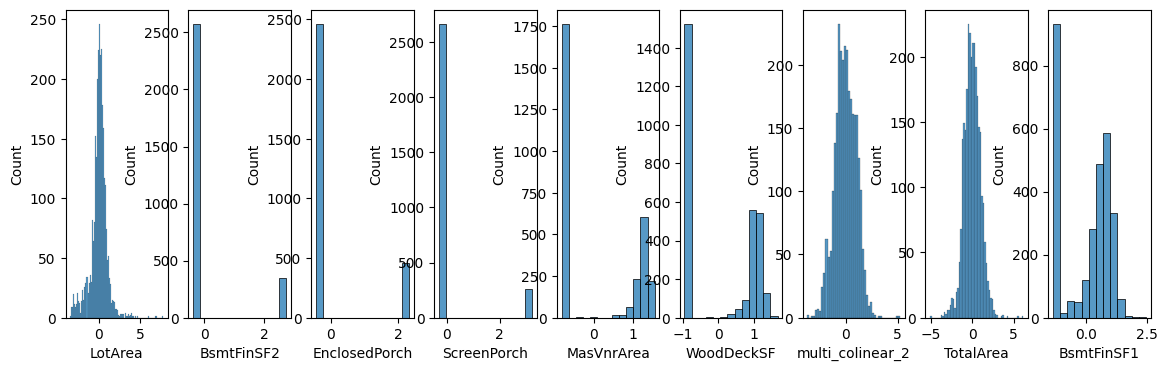

In [54]:
# VISUALIZE AFTER TRANSFORMATION
fig , axes = plt.subplots(nrows=1, ncols=9, figsize=(14,4))

for i , feature in enumerate(columns_to_transform):
    sns.histplot(data=combined_data, x=feature, ax=axes[i%9])

plt.show()

## One Hot Encoding Categorical Columns

In [55]:
combined_data = pd.get_dummies(combined_data).reset_index(drop=True)

combined_data

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60    -0.14            7            5          5             5   
1             20     0.12            6            8         31            31   
2             60     0.44            7            5          7             6   
3             70     0.10            7            5         91            36   
4             60     0.93            8            5          8             8   
...          ...      ...          ...          ...        ...           ...   
2914         160    -2.77            4            7         36            36   
2915         160    -2.81            4            5         36            36   
2916          20     1.65            5            7         46            10   
2917          85     0.28            5            5         14            14   
2918          60     0.12            7            5         13            12   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  2ndFlrSF  BsmtFullBath  \
0           1.25        0.80       -0.37     150.00       854          1.00   
1          -0.81        1.02       -0.37     284.00         0          0.00   
2           1.22        0.58       -0.37     434.00       866          1.00   
3          -0.81        0.15       -0.37     540.00       756          1.00   
4           1.35        0.76       -0.37     490.00      1053          1.00   
...          ...         ...         ...        ...       ...           ...   
2914       -0.81       -1.35       -0.37     546.00       546          0.00   
2915       -0.81        0.23       -0.37     294.00       546          0.00   
2916       -0.81        1.17       -0.37       0.00         0          1.00   
2917       -0.81        0.38       -0.37     575.00         0          0.00   
2918        1.11        0.85       -0.37     238.00      1004          0.00   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.00         2         1             3             1   
1             1.00         2         0             3             1   
2             0.00         2         1             3             1   
3             0.00         1         0             3             1   
4             0.00         2         1             4             1   
...            ...       ...       ...           ...           ...   
2914          0.00         1         1             3             1   
2915          0.00         1         1             3             1   
2916          0.00         1         0             4             1   
2917          1.00         1         0             3             1   
2918          0.00         2         1             3             1   

      Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         5.00       -0.95           61          -0.43   
1              1        31.00        1.22            0          -0.43   
2              1         7.00       -0.95           42          -0.43   
3              1         8.00       -0.95           35           2.32   
4              1         8.00        1.08           84          -0.43   
...          ...          ...         ...          ...            ...   
2914           0         0.00       -0.95            0          -0.43   
2915           0        36.00       -0.95           24          -0.43   
2916           1        46.00        1.35            0          -0.43   
2917           0         0.00        0.80           32          -0.43   
2918           1        13.00        1.08           48          -0.43   

      ScreenPorch  MoSold  YrSold  SalePrice  GarageEfficiency  TotalArea  \
0           -0.31       2    2008  208500.00            182.67       0.13   
1           -0.31       5    2007  181500.00            153.33       0.08   
2           -0.31       9    2008  223500.00            202.67       0.31   
3           -0.31       2    2006  140000.00            160.50       0

In [57]:
new_train_data = combined_data.iloc[:len(train_dataset), :]
new_test_data  = combined_data.iloc[len(train_dataset):, :]

x_train = new_train_data.drop(labels=['SalePrice'], axis=1)

# LOG TRANSFORMATION FOR TARGET FEATURE (SalePrice)
y_train = np.log1p(new_train_data['SalePrice'])

x_test = new_test_data.drop(labels=['SalePrice'], axis=1)


x_train.shape , y_train.shape, x_test.shape

((1460, 253), (1460,), (1459, 253))

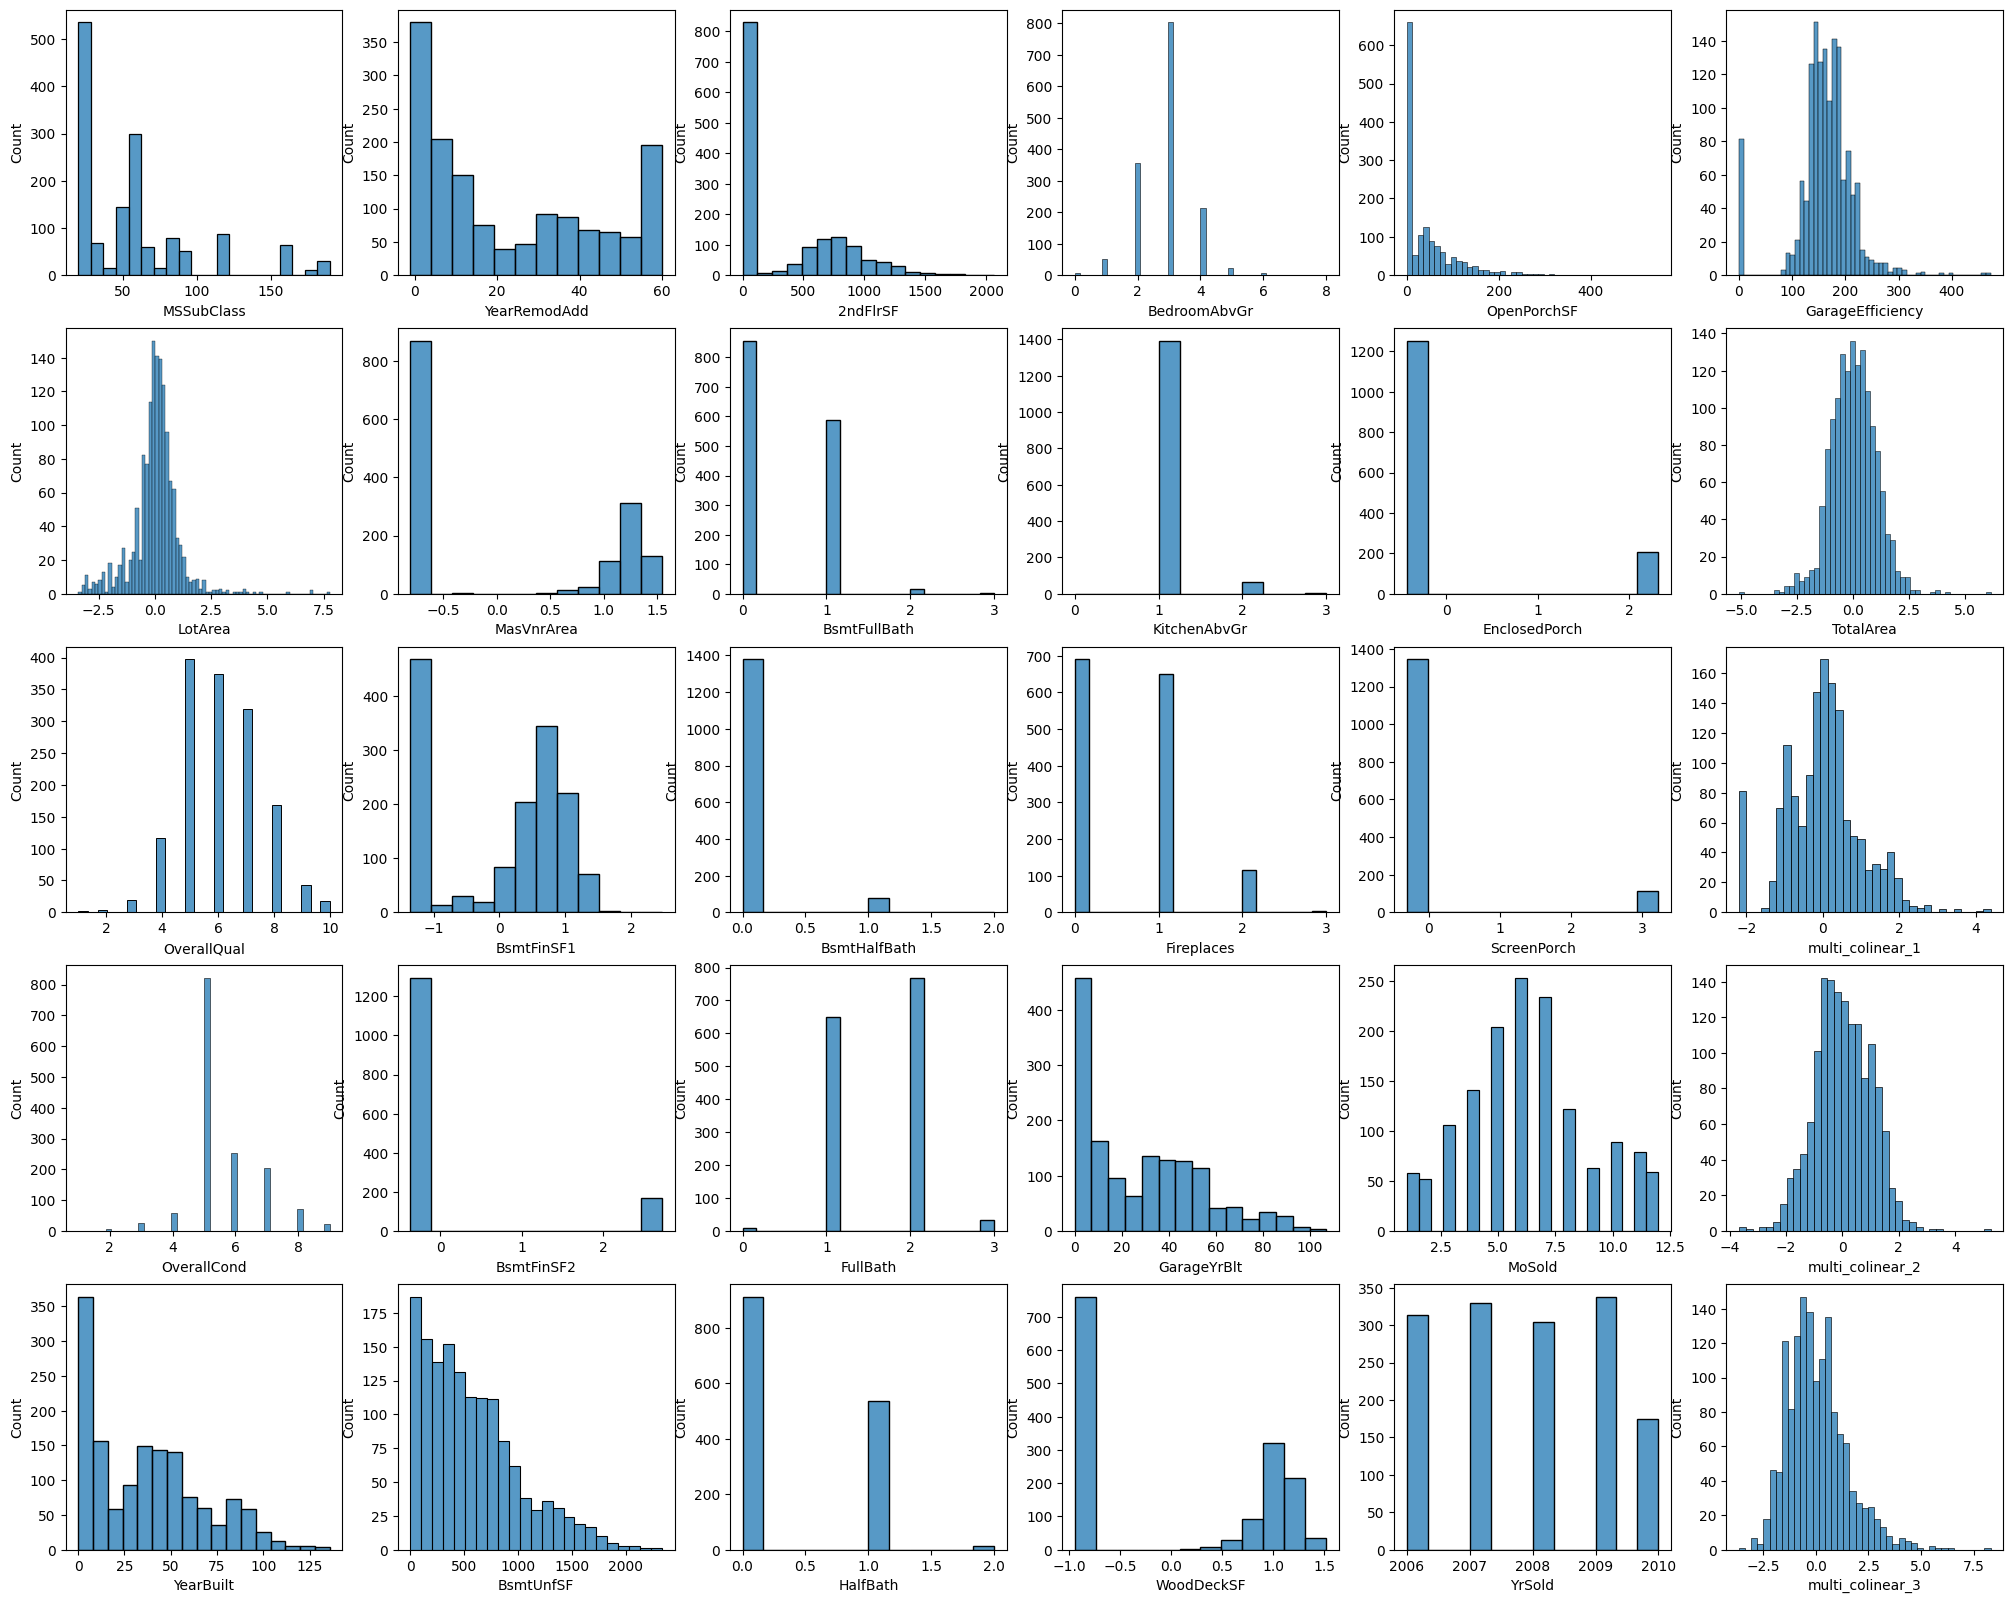

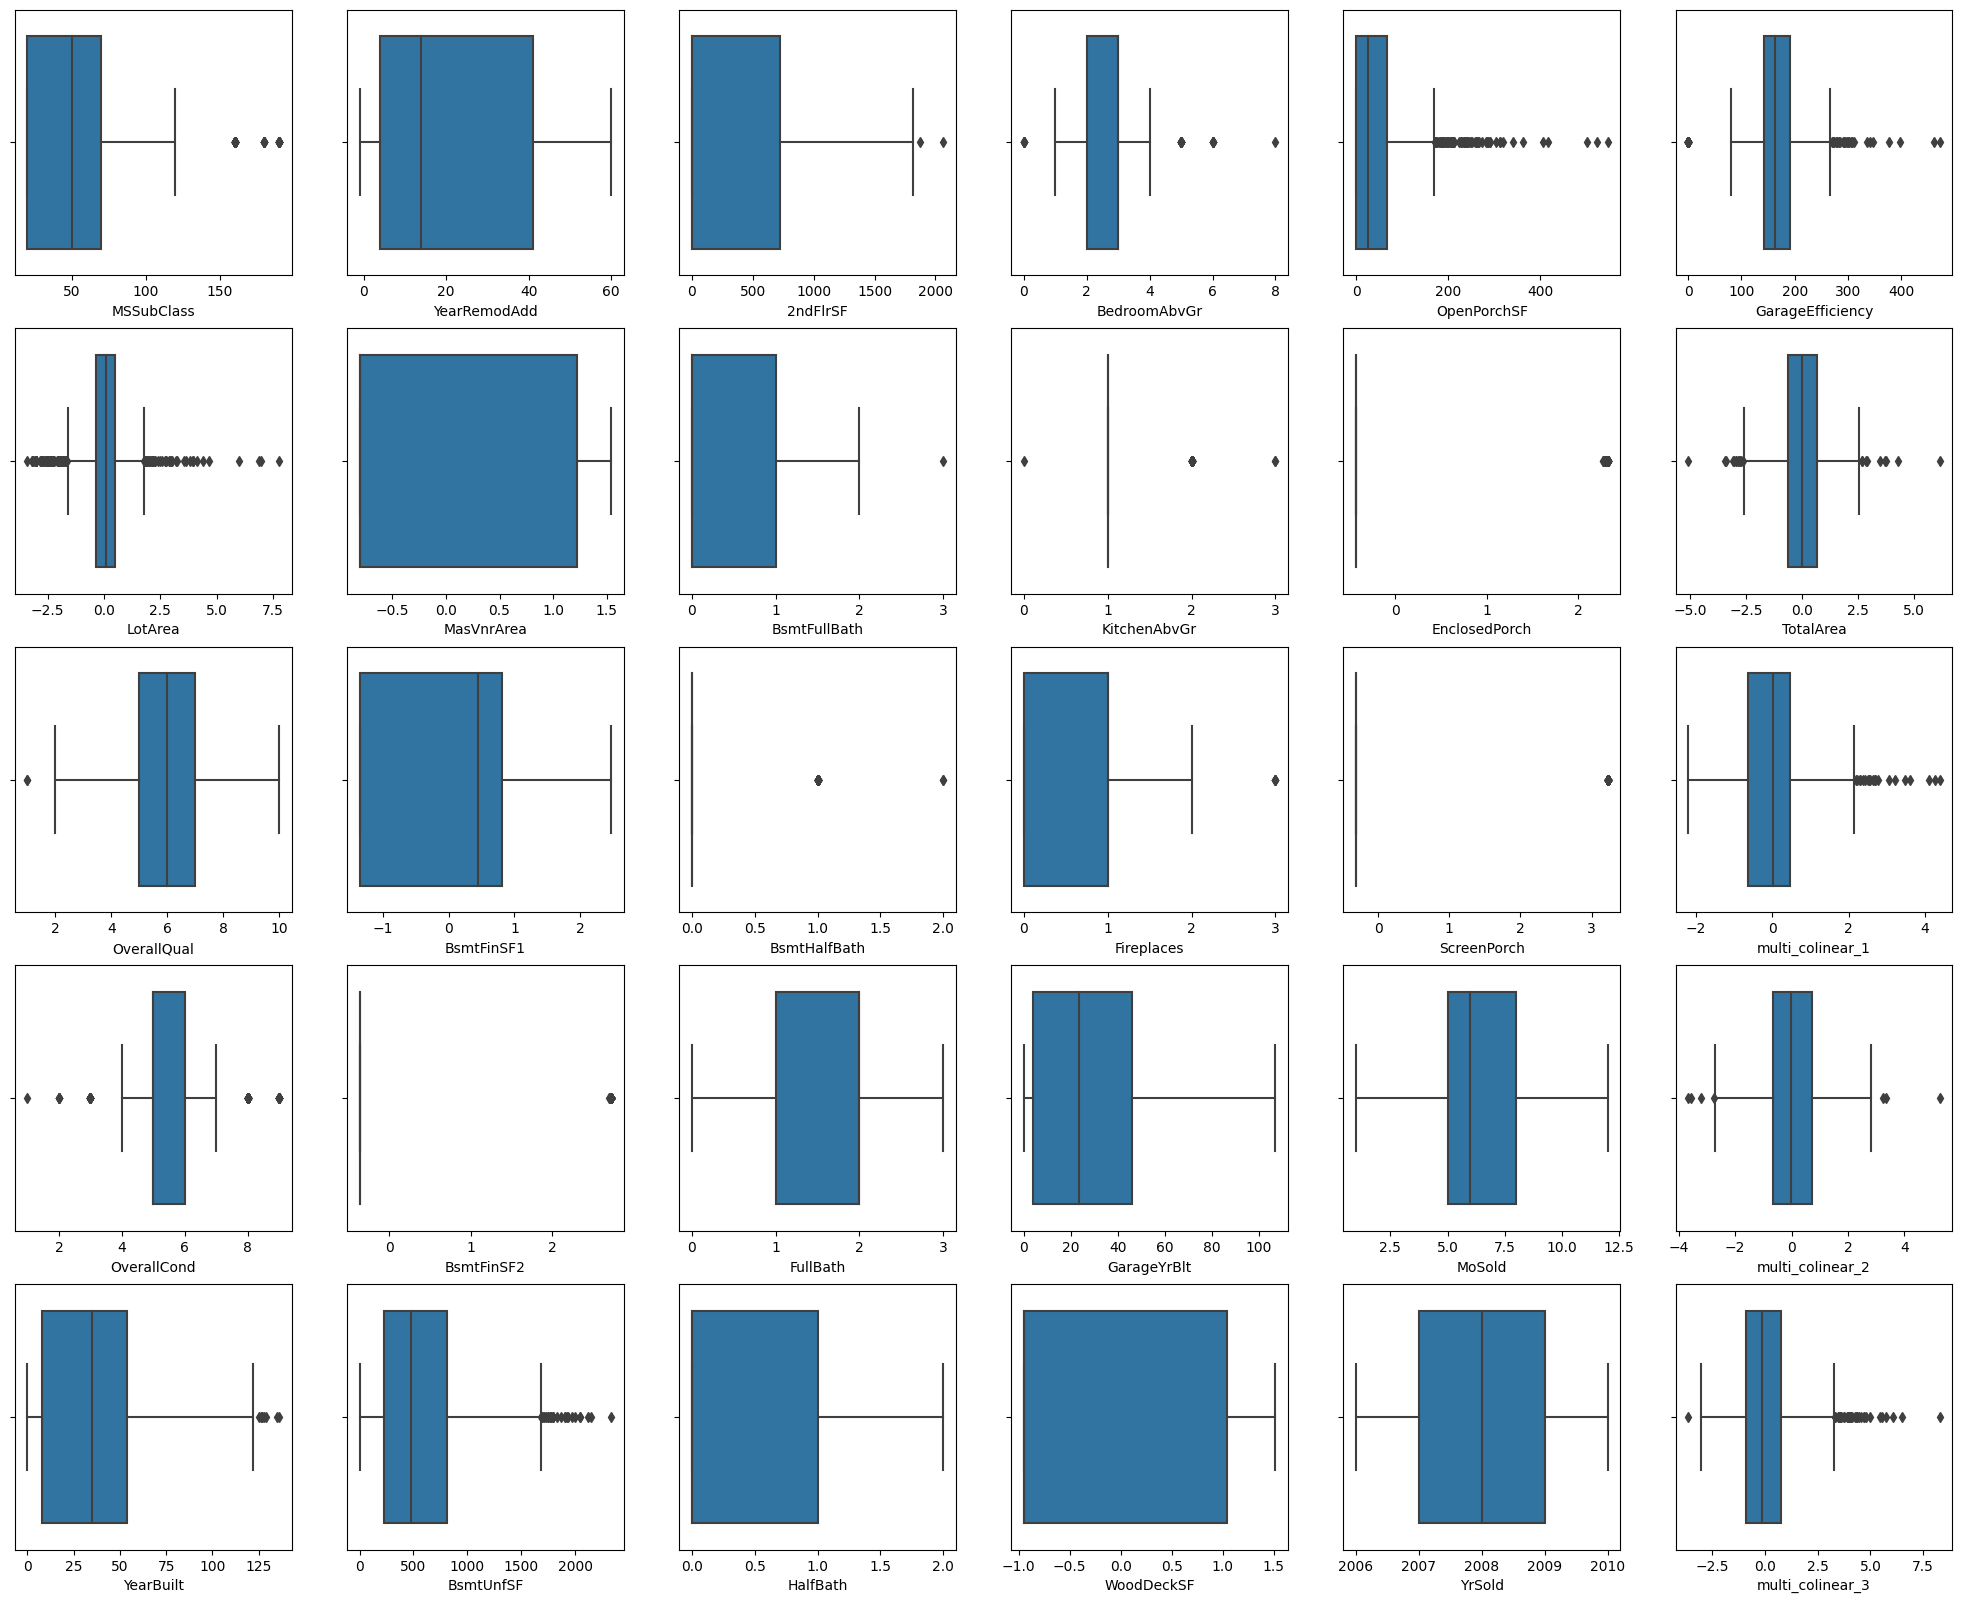

In [59]:
# SELECT ALL NUMERICAL FEATURE
numerical_feature = ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','BsmtFullBath',
                     'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',
                     'MoSold','YrSold','GarageEfficiency','TotalArea','multi_colinear_1','multi_colinear_2','multi_colinear_3']


# VISUALIZE IT 
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25,20))
for i , feature in enumerate(numerical_feature):
    sns.histplot(data= x_train , x=feature , ax=axes[i%5, i//5])

# BOXPLOT TO SEE THE OUTLIERS
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25,20))
for i,feature in enumerate(numerical_feature):
    sns.boxplot(data=x_train, x=feature, ax=axes[i%5, i//5])

plt.show()

We will perfom robust scaling to features with many outliers and are not normaly distributed.

In [61]:
# CHOOSE COLUMNS TO NORMALIZE
cols_to_robust = ['MSSubClass','YearRemodAdd', '2ndFlrSF','BedroomAbvGr','OpenPorchSF','MasVnrArea','EnclosedPorch','BsmtFinSF1','ScreenPorch','BsmtFinSF2','GarageYrBlt','YearBuilt','WoodDeckSF']
cols_to_zscore = ['GarageEfficiency','LotArea','TotalArea','OverallQual','multi_colinear_1','OverallCond','multi_colinear_2','BsmtUnfSF','multi_colinear_3']

# ROBUST SCALING NORM
robust = RobustScaler()
robust.fit(x_train[cols_to_robust])

x_train[cols_to_robust] = robust.transform(x_train[cols_to_robust])
x_test[cols_to_robust]  = robust.transform(x_test[cols_to_robust])

# ZSCORE NORM
scaler = StandardScaler()
scaler.fit(x_train[cols_to_zscore])

x_train[cols_to_zscore] = scaler.transform(x_train[cols_to_zscore])
x_test[cols_to_zscore]  = scaler.transform(x_test[cols_to_zscore])

#x_train.shape , x_test.shape
x_train.head()

((1460, 253), (1459, 253))

In [62]:
x_train.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        0.20    -0.17         0.65        -0.52      -0.65         -0.24   
1       -0.60     0.08        -0.07         2.18      -0.09          0.46   
2        0.20     0.39         0.65        -0.52      -0.61         -0.22   
3        0.40     0.07         0.65        -0.52       1.22          0.59   
4        0.20     0.87         1.37        -0.52      -0.59         -0.16   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  2ndFlrSF  BsmtFullBath  \
0        1.02        0.17        0.00      -0.94      1.17          1.00   
1        0.00        0.26        0.00      -0.64      0.00          0.00   
2        1.00        0.06        0.00      -0.30      1.19          1.00   
3        0.00       -0.14        0.00      -0.06      1.04          1.00   
4        1.06        0.14        0.00      -0.17      1.45          1.00   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0          0.00         2         1          0.00             1           0   
1          1.00         2         0          0.00             1           1   
2          0.00         2         1          0.00             1           1   
3          0.00         1         0          0.00             1           1   
4          0.00         2         1          1.00             1           1   

   GarageYrBlt  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  \
0        -0.44        0.00         0.53           0.00         0.00       2   
1         0.18        1.09        -0.37           0.00         0.00       5   
2        -0.39        0.00         0.25           0.00         0.00       9   
3        -0.37        0.00         0.15           2.75         0.00       2   
4        -0.37        1.02         0.87           0.00         0.00      12   

   YrSold  GarageEfficiency  TotalArea  multi_colinear_1  multi_colinear_2  \
0    2008              0.39       0.11              0.35             -0.64   
1    2007             -0.15       0.05             -0.06              0.57   
2    2008              0.75       0.28              0.63             -0.41   
3    2006             -0.02      -0.01              0.79             -0.61   
4    2008              0.87       1.00              1.70              0.28   

   multi_colinear_3  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              0.67             False        False        False         True   
1             -0.42             False        False        False         True   
2              0.10             False        False        False         True   
3              0.36             False        False        False         True   
4              1.48             False        False        False         True   

   MSZoning_RM  MSZoning_Unknown  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0        False             False         False         False         False   
1        False             False         False         False         False   
2        False             False          True         False         False   
3        False             False          True         False         False   
4        False             False          True         False         False   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0          True            False            False            False   
1          True            False            False            False   
2         False            False            False            False   
3         False            False            False            False   
4         False            False            False            False   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0             True             False              False          False   
1             True             False              False           True   
2             True             False              False          False 

# Model Development

# Defining Hyperparameters

# Making Predictions

In [ ]:
y_pred = pipeline_2.predict(test_df)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error is: {mse}")
# print(f"Mean Average Error is: {mae}")
# print(f"r2 score: {r2}")
result = pd.DataFrame()
result['Id'] = test_Id
result['SalePrice'] = y_pred
result.to_csv('submission.csv', index=False)